# Project Definition: Customer Personality Analysis

## 1. Problem Statement

### The Challenge
The company currently applies a uniform marketing strategy across its entire customer
base. This one-size-fits-all approach is inefficient, resulting in wasted marketing
expenditure on low-response customers and missed opportunities to engage high-value
customers. The business lacks a granular understanding of customer behaviors,
demographics, and preferences that define distinct customer types.

### The Goal
The goal of this project is to move from mass marketing to **targeted, data-driven
marketing** through a comprehensive **Customer Personality Analysis**. By applying
unsupervised clustering techniques, the project aims to identify distinct customer
segments. Understanding these segments will enable the company to tailor marketing
campaigns and product offerings to specific customer groups, improving engagement,
customer lifetime value, and overall marketing ROI.

---

## 2. Project Objectives

To address the problem statement, the project will focus on the following objectives:

### 2.1 Perform Customer Segmentation (Clustering)
- Apply unsupervised machine learning algorithms such as **K-Means** and
  **Hierarchical Clustering** to group customers based on shared characteristics.
- Ensure resulting clusters are both statistically meaningful and interpretable
  from a business perspective.

### 2.2 Profile and Characterize Customer Segments
- Analyze each cluster to identify defining traits (e.g., *High-Income Wine Enthusiasts*,
  *Budget-Conscious Families*).
- Examine relationships between demographics (Age, Income, Household Size) and
  purchasing behavior (Recency, Frequency, Monetary Value).

### 2.3 Analyze Campaign Responsiveness
- Evaluate customer response patterns across previous marketing campaigns
  (`AcceptedCmp1`–`AcceptedCmp5`).
- Identify which customer segments are most responsive to specific types of campaigns
  and offers.

### 2.4 Provide Strategic Business Recommendations
- Translate analytical findings into actionable insights.
- Recommend which products to promote to each segment and the most effective
  sales channels (Web, Store, Catalog) for engagement.

---

## 3. Data Scope and Features

The analysis is based on a dataset containing **2,240 customers**, with features grouped
into four major categories:

### Customer Attributes (People)
- Demographic variables including `Year_Birth` (Age), `Education`, `Marital_Status`,
  `Income`, and household composition (`Kidhome`, `Teenhome`).

### Purchasing Behavior (Products)
- Historical spending across six product categories:
  Wines, Fruits, Meat, Fish, Sweets, and Gold.

### Campaign History (Promotion)
- Customer interactions with five previous marketing campaigns
  (`AcceptedCmp1`–`AcceptedCmp5`) and discount usage (`NumDealsPurchases`).

### Channel Preference (Place)
- Behavioral indicators showing preferred purchasing channels:
  Web, Catalog, and In-Store (`NumWebPurchases`, `NumCatalogPurchases`,
  `NumStorePurchases`).

---

*Optional Next Step:*  
Define a clear clustering workflow by separating **feature variables** (used to build
clusters) from **profiling variables** (used to interpret and label clusters).


# IMPORT LIB

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This ensures all columns are displayed
pd.set_option('display.max_columns', None)

# IMPORT DATA

In [2]:
df = pd.read_csv('../data/raw/marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# Explpratory Data Analysis

In [3]:
# Checking For Null Values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

### Null Values were choosen to be dropped as they represent a few rows from the data set(24 rows)

In [4]:
# Dropping Null Values
df.dropna(inplace=True)
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [5]:
# Check for duplicates
duplicates = df.duplicated().sum()

In [6]:
# Check for duplicates based on the 'ID' column
duplicates = df.duplicated(subset=['ID']).sum()

In [7]:
# Dataset shape 
df.shape

(2216, 29)

In [8]:
# Dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

In [9]:
# Dataset Description
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## Insights

### 1. Detected Anomalies (Inferred from Min/Max vs. Mean)

#### A. Income: Extreme Outlier

**Observed Statistics**
- Mean: ~52,247  
- Standard Deviation: ~25,173  
- Maximum: 666,666  

**Issue**  
The maximum income value is more than **12× the mean** and approximately **24 standard
deviations above** the average.

**Inference**  
The value `666,666` appears suspicious. Repeated-digit values are often used as
placeholders or dummy entries in data systems. Even if this value is real, it represents
a severe outlier that would significantly distort scale-sensitive models such as linear
regression.

---

#### B. Year_Birth: Likely Data Entry Error

**Observed Statistics**
- Mean: ~1968  
- Minimum: 1893  
- Standard Deviation: ~12  

**Issue**  
A minimum value of 1893 implies a customer age exceeding 120 years if the dataset
represents recent data (e.g., 2014–2020).

**Inference**  
This value lies far outside a reasonable range and beyond the approximate 3-sigma
boundary (1968 − 3×12 ≈ 1932). It is almost certainly a data entry error or a default
system date (e.g., 1993 or 1983 intended).

---

#### C. MntMeatProducts (and Other `Mnt*` Variables): High Skew and Variance

**Observed Statistics**
- Mean: ~167  
- Standard Deviation: ~224 (greater than the mean)  
- Maximum: 1,725  

**Issue**  
The standard deviation exceeds the mean, and the maximum value is roughly **10× the
mean**.

**Inference**  
This pattern indicates a strongly right-skewed distribution. Most customers spend small
amounts, while a small number of high spenders (“whales”) account for disproportionately
large values. This behavior is typical in customer spending data and not necessarily an
error.

---

### 2. Strategies to Address Identified Issues

The appropriate treatment depends on the analytical goal (e.g., predictive modeling
versus reporting).

#### Strategy A: Trimming (Row Removal)
**Best suited for:** Clearly erroneous data such as invalid `Year_Birth` values  

**Action**  
Remove records that are physically impossible or highly improbable.

**Example Rule**
```sql
DELETE WHERE Year_Birth < 1920


In [10]:
# 1. Convert to Datetime (if not already)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# 2. Feature Engineering: Create "Days_Enrolled"
# We use the max date in the data as the "snapshot" time
snapshot_date = df['Dt_Customer'].max()
df['Days_Enrolled'] = (snapshot_date - df['Dt_Customer']).dt.days
df.drop("Dt_Customer", axis=1, inplace = True)
print(df["Days_Enrolled"].head())
df.head()

0    663
1    113
2    312
3    139
4    161
Name: Days_Enrolled, dtype: int64


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Days_Enrolled
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,663
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,113
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,312
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,139
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,161


In [11]:
# Seperare into cat and num cols
cat_col = df.select_dtypes(include="object").columns.tolist()
num_col = df.select_dtypes(include="number").columns.tolist()

ID = "ID"

if ID in num_col:
    num_col.remove(ID)

print(num_col)
cat_col

['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Days_Enrolled']


['Education', 'Marital_Status']

In [12]:
# Print Unique Rows
def print_unquie_rows(df, column_name):
    unique_values = df[column_name].unique()
    print(f"Unique values in column '{column_name}':")
    for value in unique_values:
        print(value)

In [13]:
from contextlib import redirect_stdout

# 1. Open a new text file in 'write' mode ('w')
with open('unique_rows_report.txt', 'w') as f:
    
    # 2. Redirect all 'print' statements to this file
    with redirect_stdout(f):
        print("--- Unique Value Report ---\n")
        
        # 3. Run your loop
        for col in num_col:
            # Note: I kept your function name 'print_unquie_rows'
            # Make sure this function is defined in a previous cell!
            print_unquie_rows(df, col) 
            
print("Done! Check 'unique_rows_report.txt' in your folder.")

Done! Check 'unique_rows_report.txt' in your folder.


# Data Quality & Structural Analysis Report  
**Source:** `unique_rows_report.txt`

## Overview
This report summarizes critical data quality issues and structural insights identified
from the `unique_rows_report.txt` file. These findings complement earlier statistical
summaries by revealing column-level behaviors (such as constant values and rare entries)
that are not easily detected through descriptive statistics alone.

---

## Key Findings and Inferences

### 1. Detection of Zero-Variance (Constant) Columns

Two columns were found to contain **only a single unique value across the entire dataset**:

- **`Z_CostContact`**: Constant value = `3`
- **`Z_Revenue`**: Constant value = `11`

**Inference**  
These columns provide **no analytical value** because they contain no variability.
They are likely system-level constants or default configuration parameters.

**Impact**  
- Add no predictive or descriptive power  
- Introduce noise in distance-based algorithms (e.g., K-Means clustering)  
- Waste memory and computational resources  

**Recommended Action**  
Drop both columns from the dataset prior to analysis or modeling.

---

### 2. Confirmation of Specific Outliers

The unique value listings confirm the presence of previously suspected data quality
issues:

#### Year_Birth
- Erroneous values detected: `1893`, `1899`, `1900`

**Inference**  
These entries imply customer ages exceeding 120 years and confirm that the low minimum
value is not a single anomaly but a repeated data quality issue. These are almost
certainly data entry errors or default placeholders.

---

#### Income
- Extreme value detected: `666666.0`
- Next highest values are around the `~160,000` range (e.g., `162397.0`, `157733.0`)

**Inference**  
The income value `666666.0` is an isolated anomaly and strongly suggests a dummy or
placeholder value rather than a genuine observation.

---

### 3. Verification of Categorical Variable Integrity

#### Campaign Acceptance Flags (`AcceptedCmp1` – `AcceptedCmp5`)
- Observed values: `0`, `1` only

**Inference**  
These variables are clean binary indicators with no unexpected or invalid categories.

---

#### Family Structure Variables
- **`Kidhome`**: Values limited to `0`, `1`, `2`
- **`Teenhome`**: Values limited to `0`, `1`, `2`

**Inference**  
The dataset enforces a realistic household constraint: no customer has more than two
children or two teenagers. This is useful for segmentation and customer profiling.

---

### 4. High Cardinality in Purchase Count Variables

#### Number of Purchases
- **`NumWebPurchases`**: Long tail extending to values such as `23`, `25`, `27`
- **`NumCatalogPurchases`**: Maximum observed value = `28`

**Inference**  
While most customers have relatively low purchase counts, a small subset exhibits very
high activity. These customers likely represent **“power users”** and may form distinct
clusters in unsupervised learning or warrant separate business strategies.

---

## Recommended Immediate Action

### Drop Constant Columns
Remove the following columns from the dataset:
- `Z_CostContact`
- `Z_Revenue`

These columns contain no informational value and should be excluded from further
analysis, modeling, or feature engineering.

---

## Conclusion
The `unique_rows_report.txt` file reveals critical structural issues that are not visible
from summary statistics alone. Addressing constant columns, confirmed outliers, and
understanding variable cardinality will significantly improve data quality and model
performance in subsequent analytical steps.


In [14]:
# Dropping     'Z_CostContact', and 'Z_Revenue',
df.drop(['Z_CostContact','Z_Revenue',], axis=1, inplace=True)
num_col.remove("Z_CostContact")
num_col.remove("Z_Revenue")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days_Enrolled
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,663
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,113
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,312
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,139
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,161


In [15]:
df.shape

(2216, 27)

In [16]:
# Dropping Birth before 1950
print(df.loc[df["Year_Birth"] < 1950, "Year_Birth"].value_counts().sum())
df = df.loc[df["Year_Birth"] >= 1950].reset_index(drop=True)
print(df.loc[df["Year_Birth"] < 1950, "Year_Birth"].value_counts().sum())

109
0


### Insight
Out of 2216 rows, the birth year of 109 had birth year < 1950, choose to drop rows as they do not hold significant point in the dataset. New rows 2130

### Investigating Income

In [17]:
print(f"Max Income", df["Income"].max())
print(f"Min Income", df["Income"].min())
print(df.loc[df["Income"] > 660000, "Income"].value_counts().sum())
# Dropping Income greater than 660000
df = df.loc[df["Income"] <= 660000].reset_index(drop=True)
# Verifying
print(df.loc[df["Income"] > 660000, "Income"].value_counts().sum())

Max Income 666666.0
Min Income 1730.0
1
0


# Visualisation

In [18]:
import math

def plot_hist_kde_grid(
    df,
    columns,
    n_cols=3,
    bins=30,
    figsize_per_plot=(5, 4),
    theme="whitegrid"
):

    sns.set_theme(style=theme)

    n_rows = math.ceil(len(columns) / n_cols)
    fig_width = figsize_per_plot[0] * n_cols
    fig_height = figsize_per_plot[1] * n_rows

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height))
    axes = axes.flatten()  # makes indexing easy

    for i, col in enumerate(columns):
        sns.histplot(
            df[col],
            bins=bins,
            kde=True,
            ax=axes[i]
        )
        axes[i].set_title(f"{col} Distribution")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frequency")

    # Remove empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


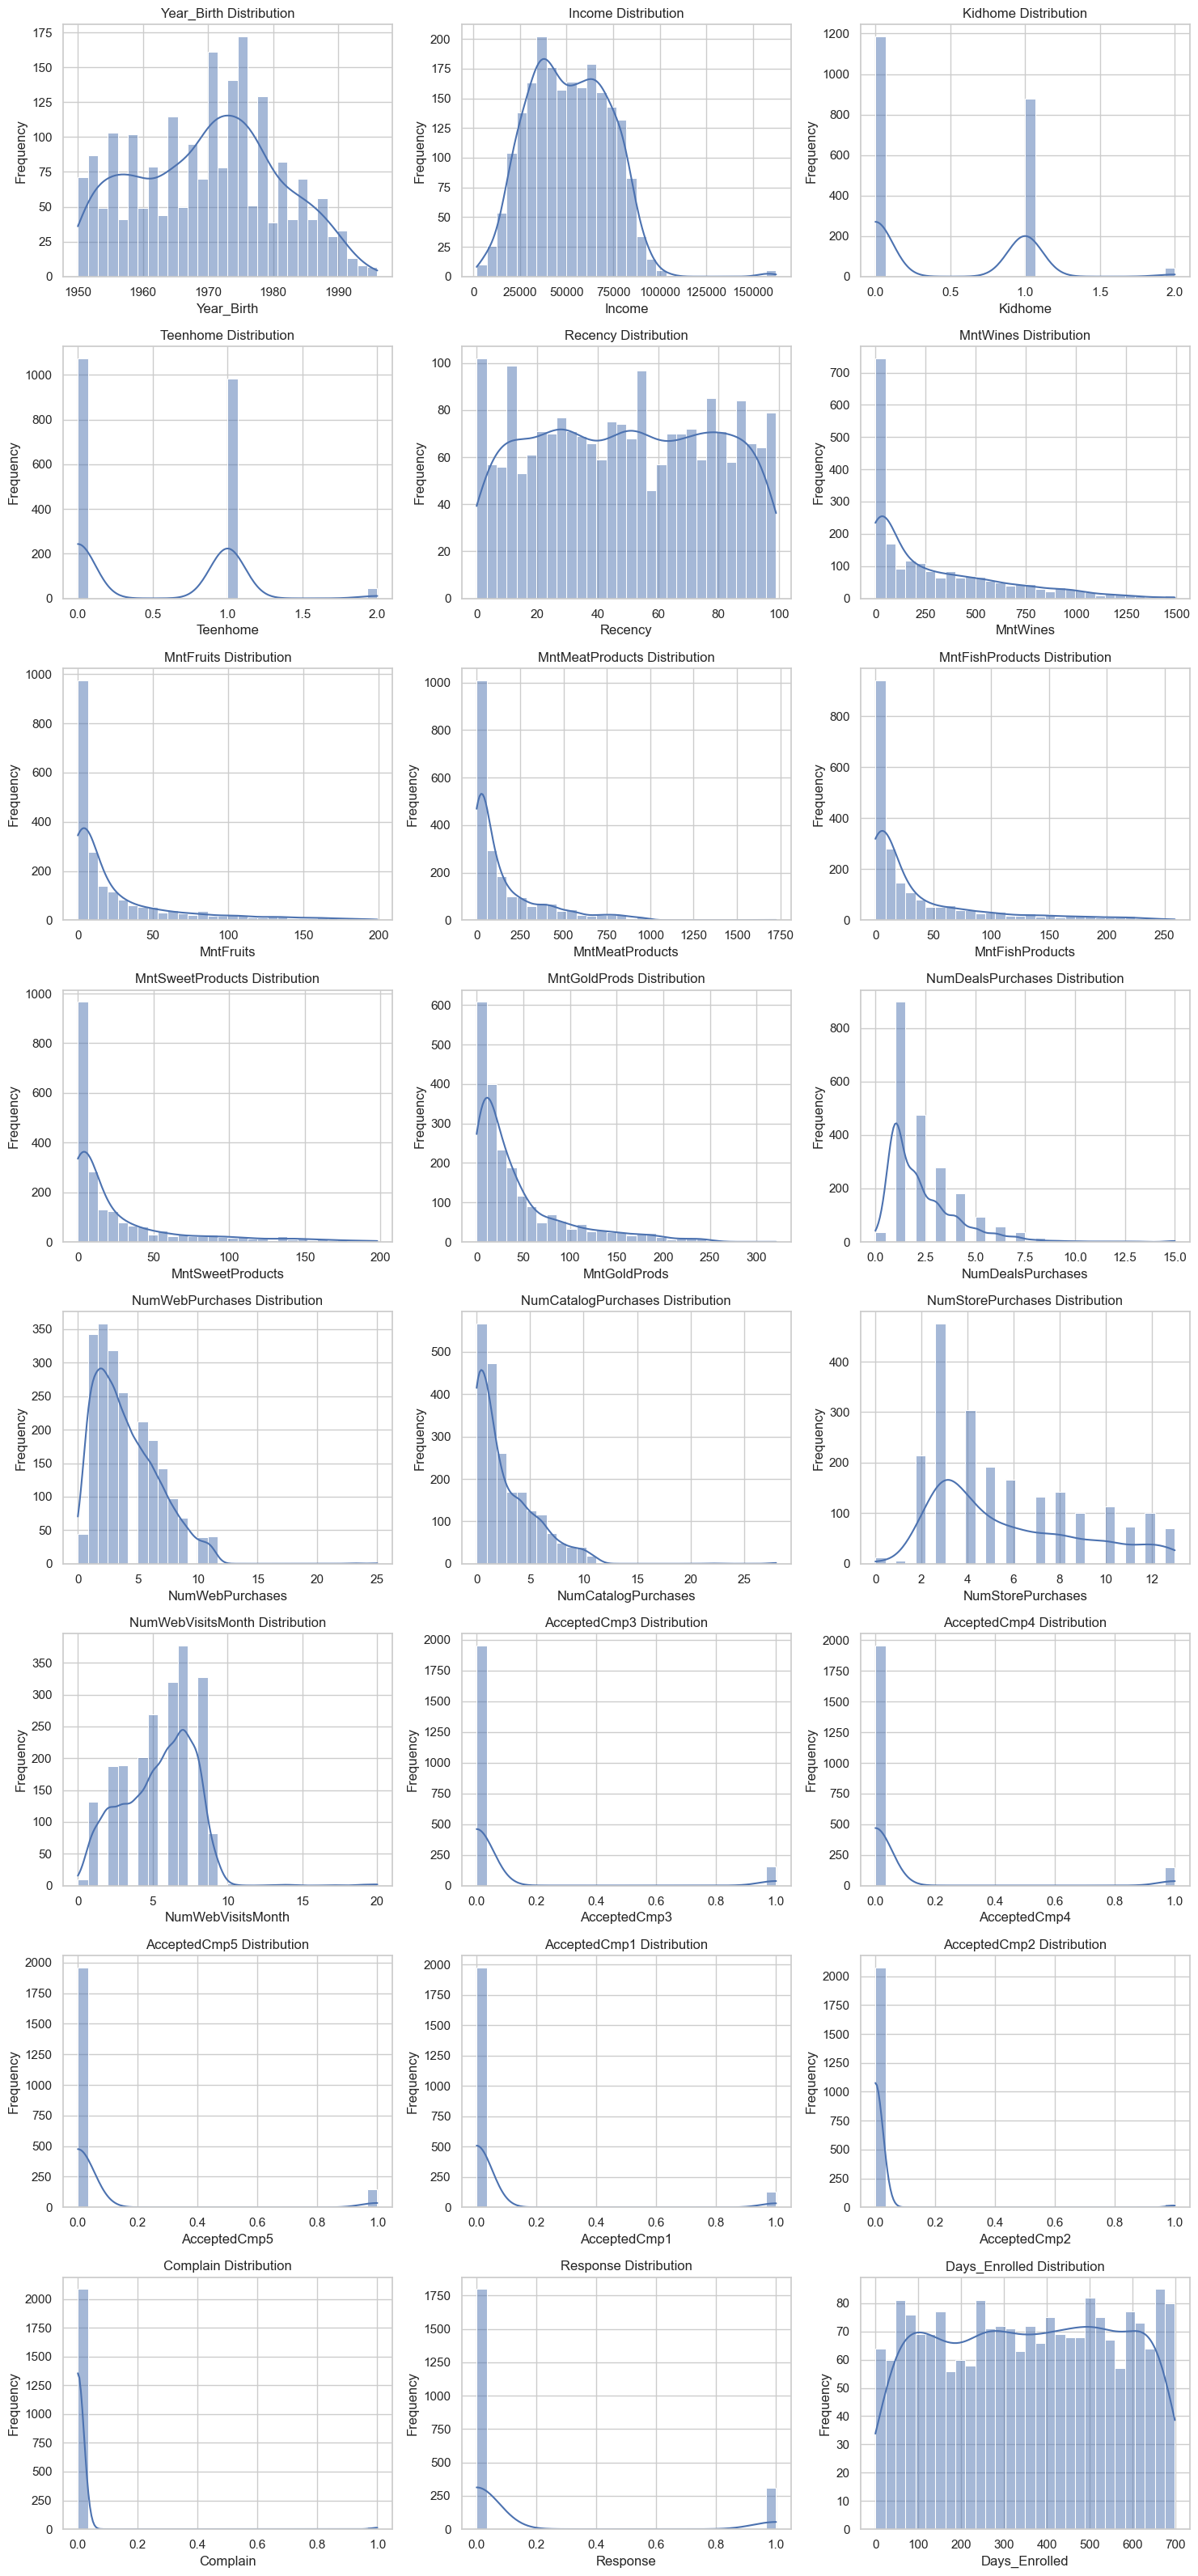

In [19]:
plot_hist_kde_grid(df, num_col, n_cols=3)

In [20]:
# Columns to exclude from scaling
bin_cols = [
    'AcceptedCmp3',
    'AcceptedCmp4',
    'AcceptedCmp5',
    'AcceptedCmp1',
    'AcceptedCmp2',
    'Complain',
    'Response'
]

# Remove excluded columns
num_col = [col for col in num_col if col not in bin_cols]

print(num_col)
print(bin_cols)


['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Days_Enrolled']
['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']


In [21]:
# Check
df[num_col].head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Days_Enrolled
0,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,663
1,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,113
2,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,312
3,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,139
4,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,161


In [22]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

scaler_robust = RobustScaler()

df_test = df.copy()

df_test[num_col] = scaler_robust.fit_transform(
    df[num_col]
)


In [23]:
df_test

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days_Enrolled
0,5524,-0.823529,Graduation,Single,0.228406,0.0,0.0,0.183673,1.002141,2.601626,2.360736,3.636364,2.580645,1.361702,0.5,1.25,2.00,-0.2,0.333333,0,0,0,0,0,0,1,0.860777
1,2174,-1.000000,Graduation,Single,-0.129601,1.0,1.0,-0.224490,-0.334047,-0.227642,-0.289571,-0.227273,-0.225806,-0.382979,0.0,-0.50,-0.25,-0.6,-0.333333,0,0,0,0,0,0,0,-0.693993
2,4141,-0.352941,Graduation,Together,0.637440,0.0,0.0,-0.469388,0.554604,1.333333,0.304294,2.250000,0.419355,0.382979,-0.5,1.25,0.00,1.0,-0.666667,0,0,0,0,0,0,0,-0.131449
3,6182,0.764706,Graduation,Together,-0.727534,1.0,0.0,-0.469388,-0.334047,-0.130081,-0.220859,-0.045455,-0.161290,-0.404255,0.0,-0.25,-0.50,-0.2,0.000000,0,0,0,0,0,0,0,-0.620495
4,5324,0.588235,PhD,Married,0.233111,1.0,0.0,0.918367,0.012848,1.138211,0.260123,0.772727,0.612903,-0.191489,1.5,0.50,0.25,0.2,-0.333333,0,0,0,0,0,0,0,-0.558304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,8372,0.176471,Graduation,Married,-0.491523,1.0,0.0,0.653061,-0.351178,-0.162602,-0.284663,-0.136364,-0.193548,-0.319149,-0.5,-0.50,-0.50,-0.6,0.333333,0,0,0,0,0,0,0,0.012721
2102,10870,-0.235294,Graduation,Married,0.322051,0.0,1.0,-0.061224,1.160600,1.138211,0.574233,0.681818,3.548387,4.744681,0.0,1.50,0.25,-0.2,-0.333333,0,0,0,0,0,0,0,0.063604
2103,7270,0.588235,Graduation,Divorced,0.193285,0.0,0.0,0.857143,1.586724,1.300813,0.746012,0.454545,0.129032,0.000000,-0.5,-0.25,0.25,1.6,0.000000,0,1,0,0,0,0,0,-0.575265
2104,8235,-0.882353,Master,Together,0.565559,0.0,1.0,-0.836735,0.558887,0.715447,0.731288,1.545455,0.709677,0.787234,0.0,0.75,0.75,1.0,-1.000000,0,0,0,0,0,0,0,-0.572438


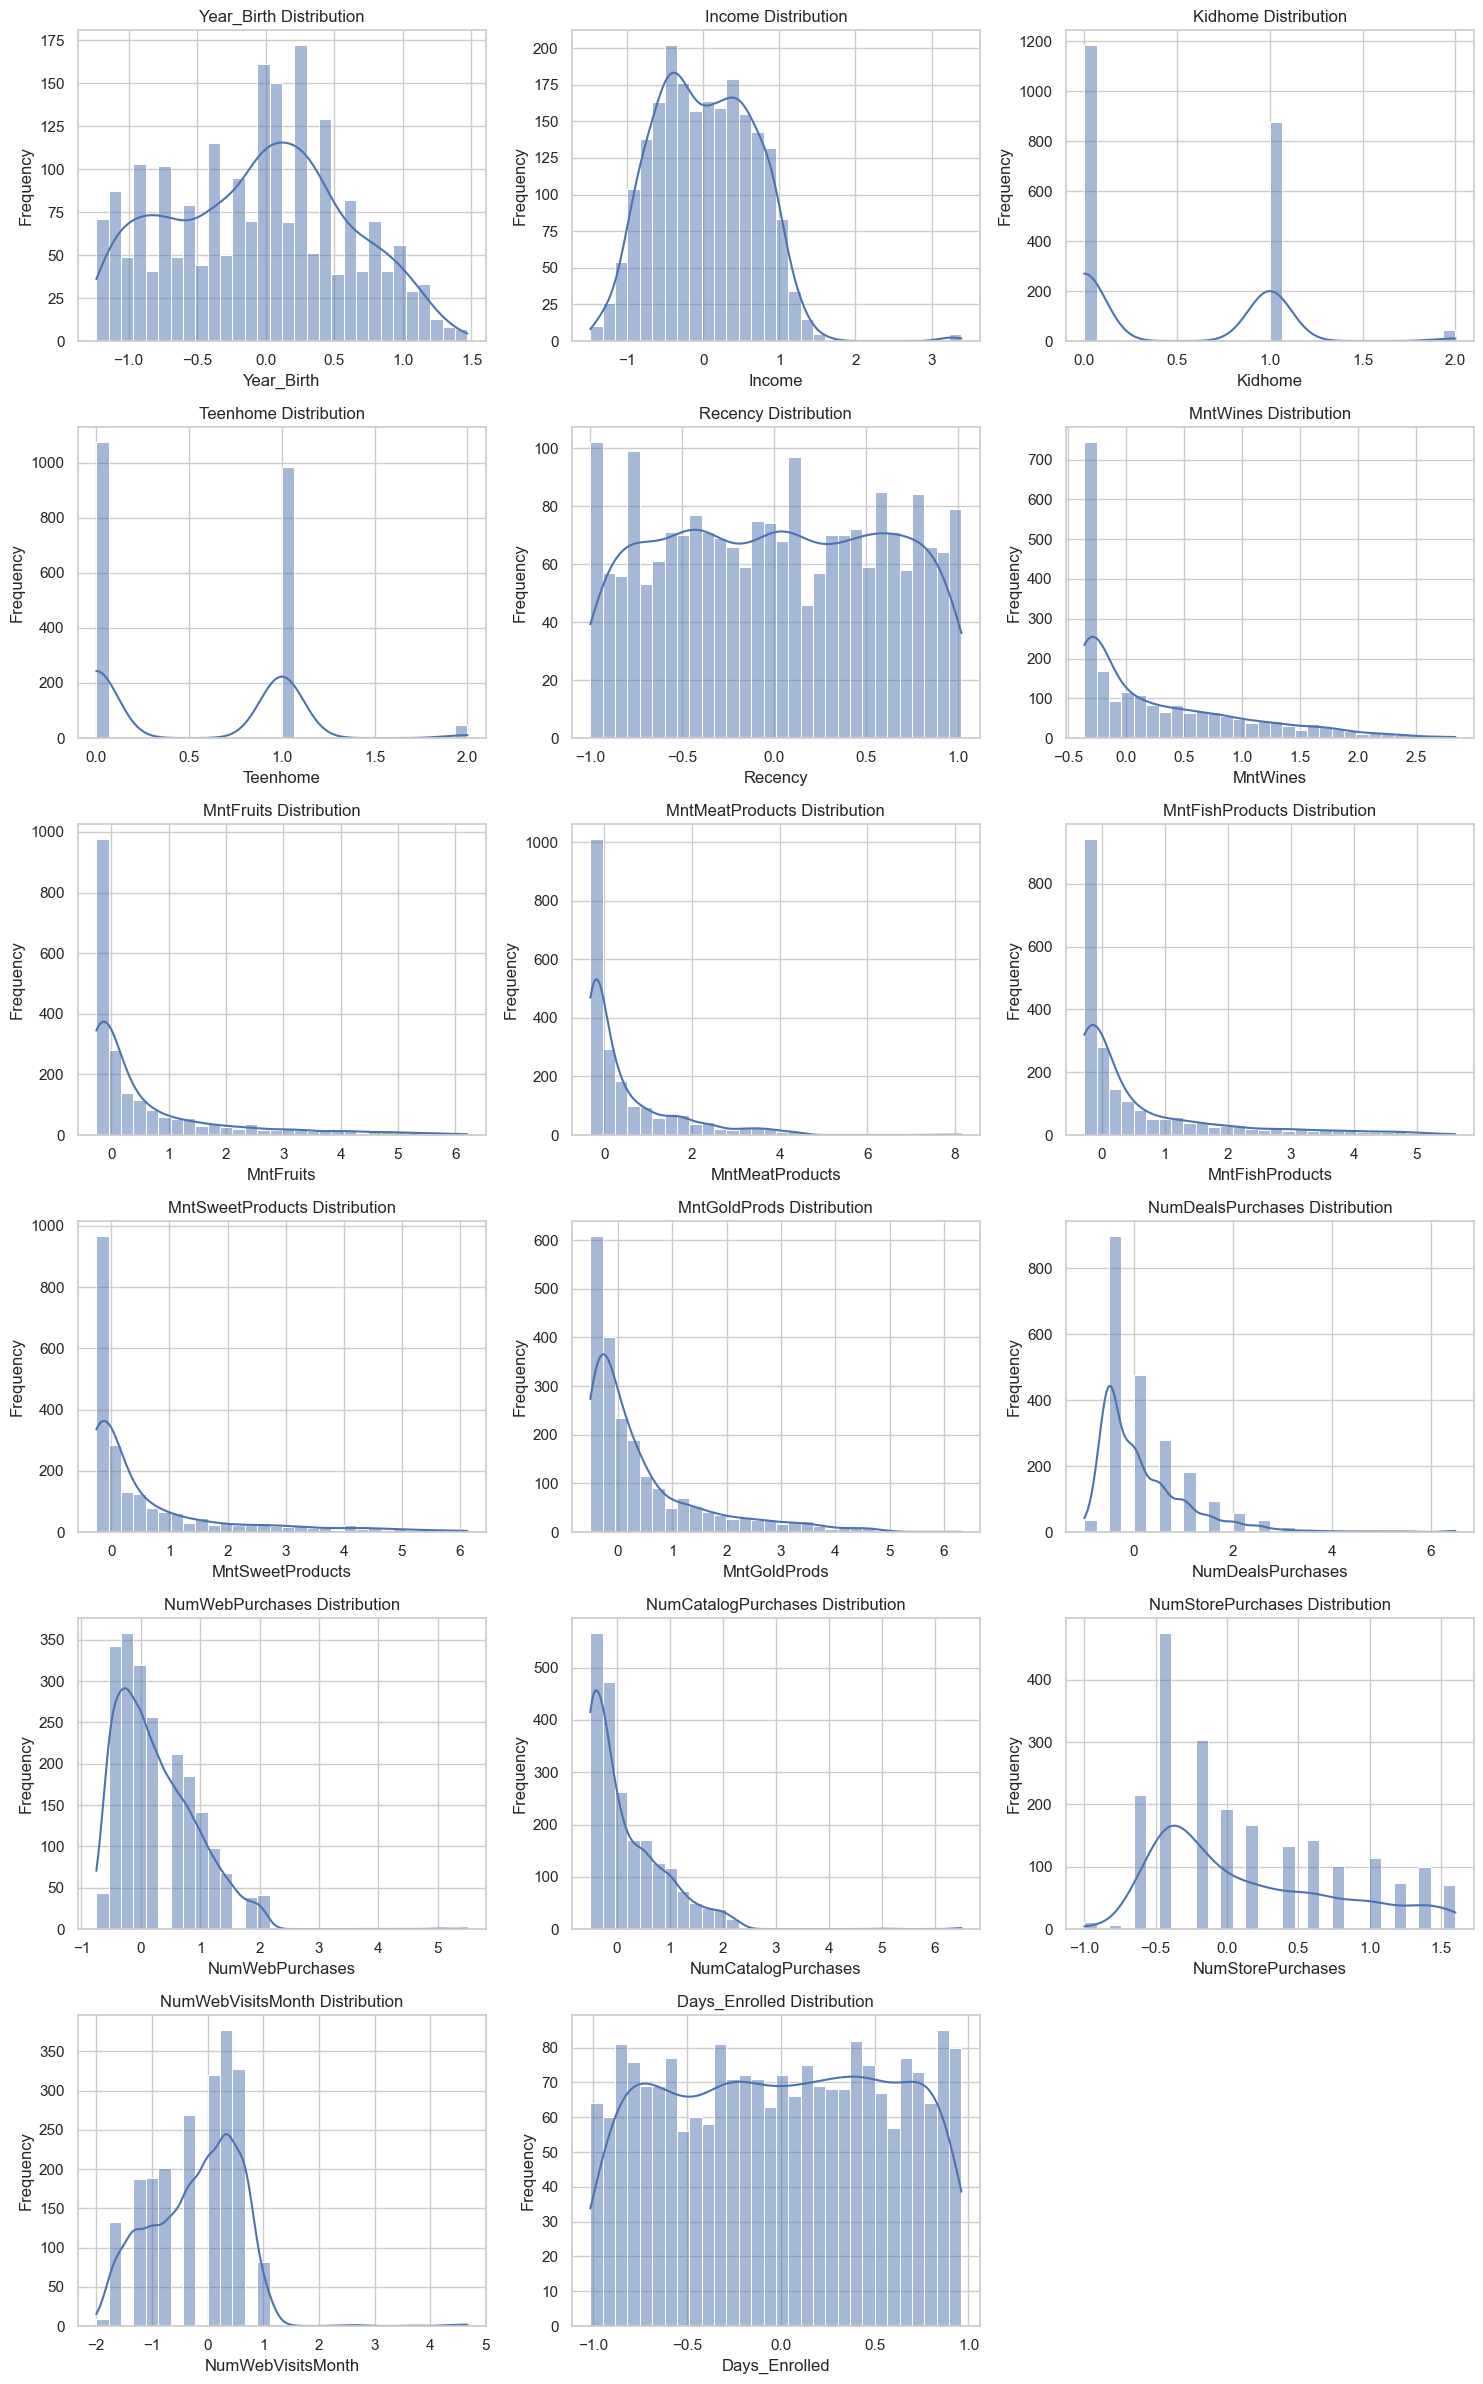

In [24]:
plot_hist_kde_grid(df_test, num_col, n_cols=3)

"While Robust Scaler mitigates the impact of outliers, it does not correct the underlying data distribution. Therefore, we applied a Power Transformation (Yeo-Johnson) to normalize the highly skewed features effectively."

In [25]:
from scipy.stats import normaltest, skew
from sklearn.preprocessing import PowerTransformer

def auto_tune_data(df, cols_to_tune):

    tuned_df = df.copy()
    pt = PowerTransformer(method='yeo-johnson', standardize=True)
    
    print(f"{'Column':<20} | {'Status':<15} | {'Skewness':<10} | {'K^2 p-value':<10}")
    print("-" * 65)

    for col in cols_to_tune:
        # 1. PRE-TEST: Check original skewness and K^2 test
        original_data = df[col].dropna()
        orig_skew = skew(original_data)
        k2, p_val = normaltest(original_data)
        
        # Interpret K^2 test (p < 0.05 means NOT normal/skewed)
        is_skewed = p_val < 0.05
        status = "SKEWED" if is_skewed else "Normal"
        
        print(f"{col:<20} | {status:<15} | {orig_skew:.2f}       | {p_val:.2e}")

        # 2. AUTO-TUNE: Apply Yeo-Johnson Transformation
        # We reshape because sklearn expects 2D array
        transformed_data = pt.fit_transform(df[[col]])
        
        # Save as new column with prefix
        new_col_name = f"Tuned_{col}"
        tuned_df[new_col_name] = transformed_data
        
        # 3. POST-TEST: Check skewness again
        new_skew = skew(transformed_data)[0] # [0] because it returns an array
        k2_new, p_val_new = normaltest(transformed_data.flatten())
        
        print(f"{new_col_name:<20} | Tuned           | {new_skew:.2f}       | {p_val_new:.2e}")
        print("-" * 65)
        
    return tuned_df


In [26]:
cat_col

['Education', 'Marital_Status']

In [27]:
df[num_col].head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Days_Enrolled
0,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,663
1,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,113
2,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,312
3,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,139
4,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,161


In [28]:
tuned_df = auto_tune_data(df, num_col)

Column               | Status          | Skewness   | K^2 p-value
-----------------------------------------------------------------
Year_Birth           | SKEWED          | -0.00       | 1.21e-46
Tuned_Year_Birth     | Tuned           | -0.00       | 1.01e-46
-----------------------------------------------------------------
Income               | SKEWED          | 0.35       | 5.43e-14
Tuned_Income         | Tuned           | -0.04       | 7.21e-01
-----------------------------------------------------------------
Kidhome              | SKEWED          | 0.57       | 1.22e-76
Tuned_Kidhome        | Tuned           | 0.28       | 0.00e+00
-----------------------------------------------------------------
Teenhome             | SKEWED          | 0.37       | 2.37e-129
Tuned_Teenhome       | Tuned           | 0.10       | 0.00e+00
-----------------------------------------------------------------
Recency              | SKEWED          | -0.00       | 0.00e+00
Tuned_Recency        | Tuned    

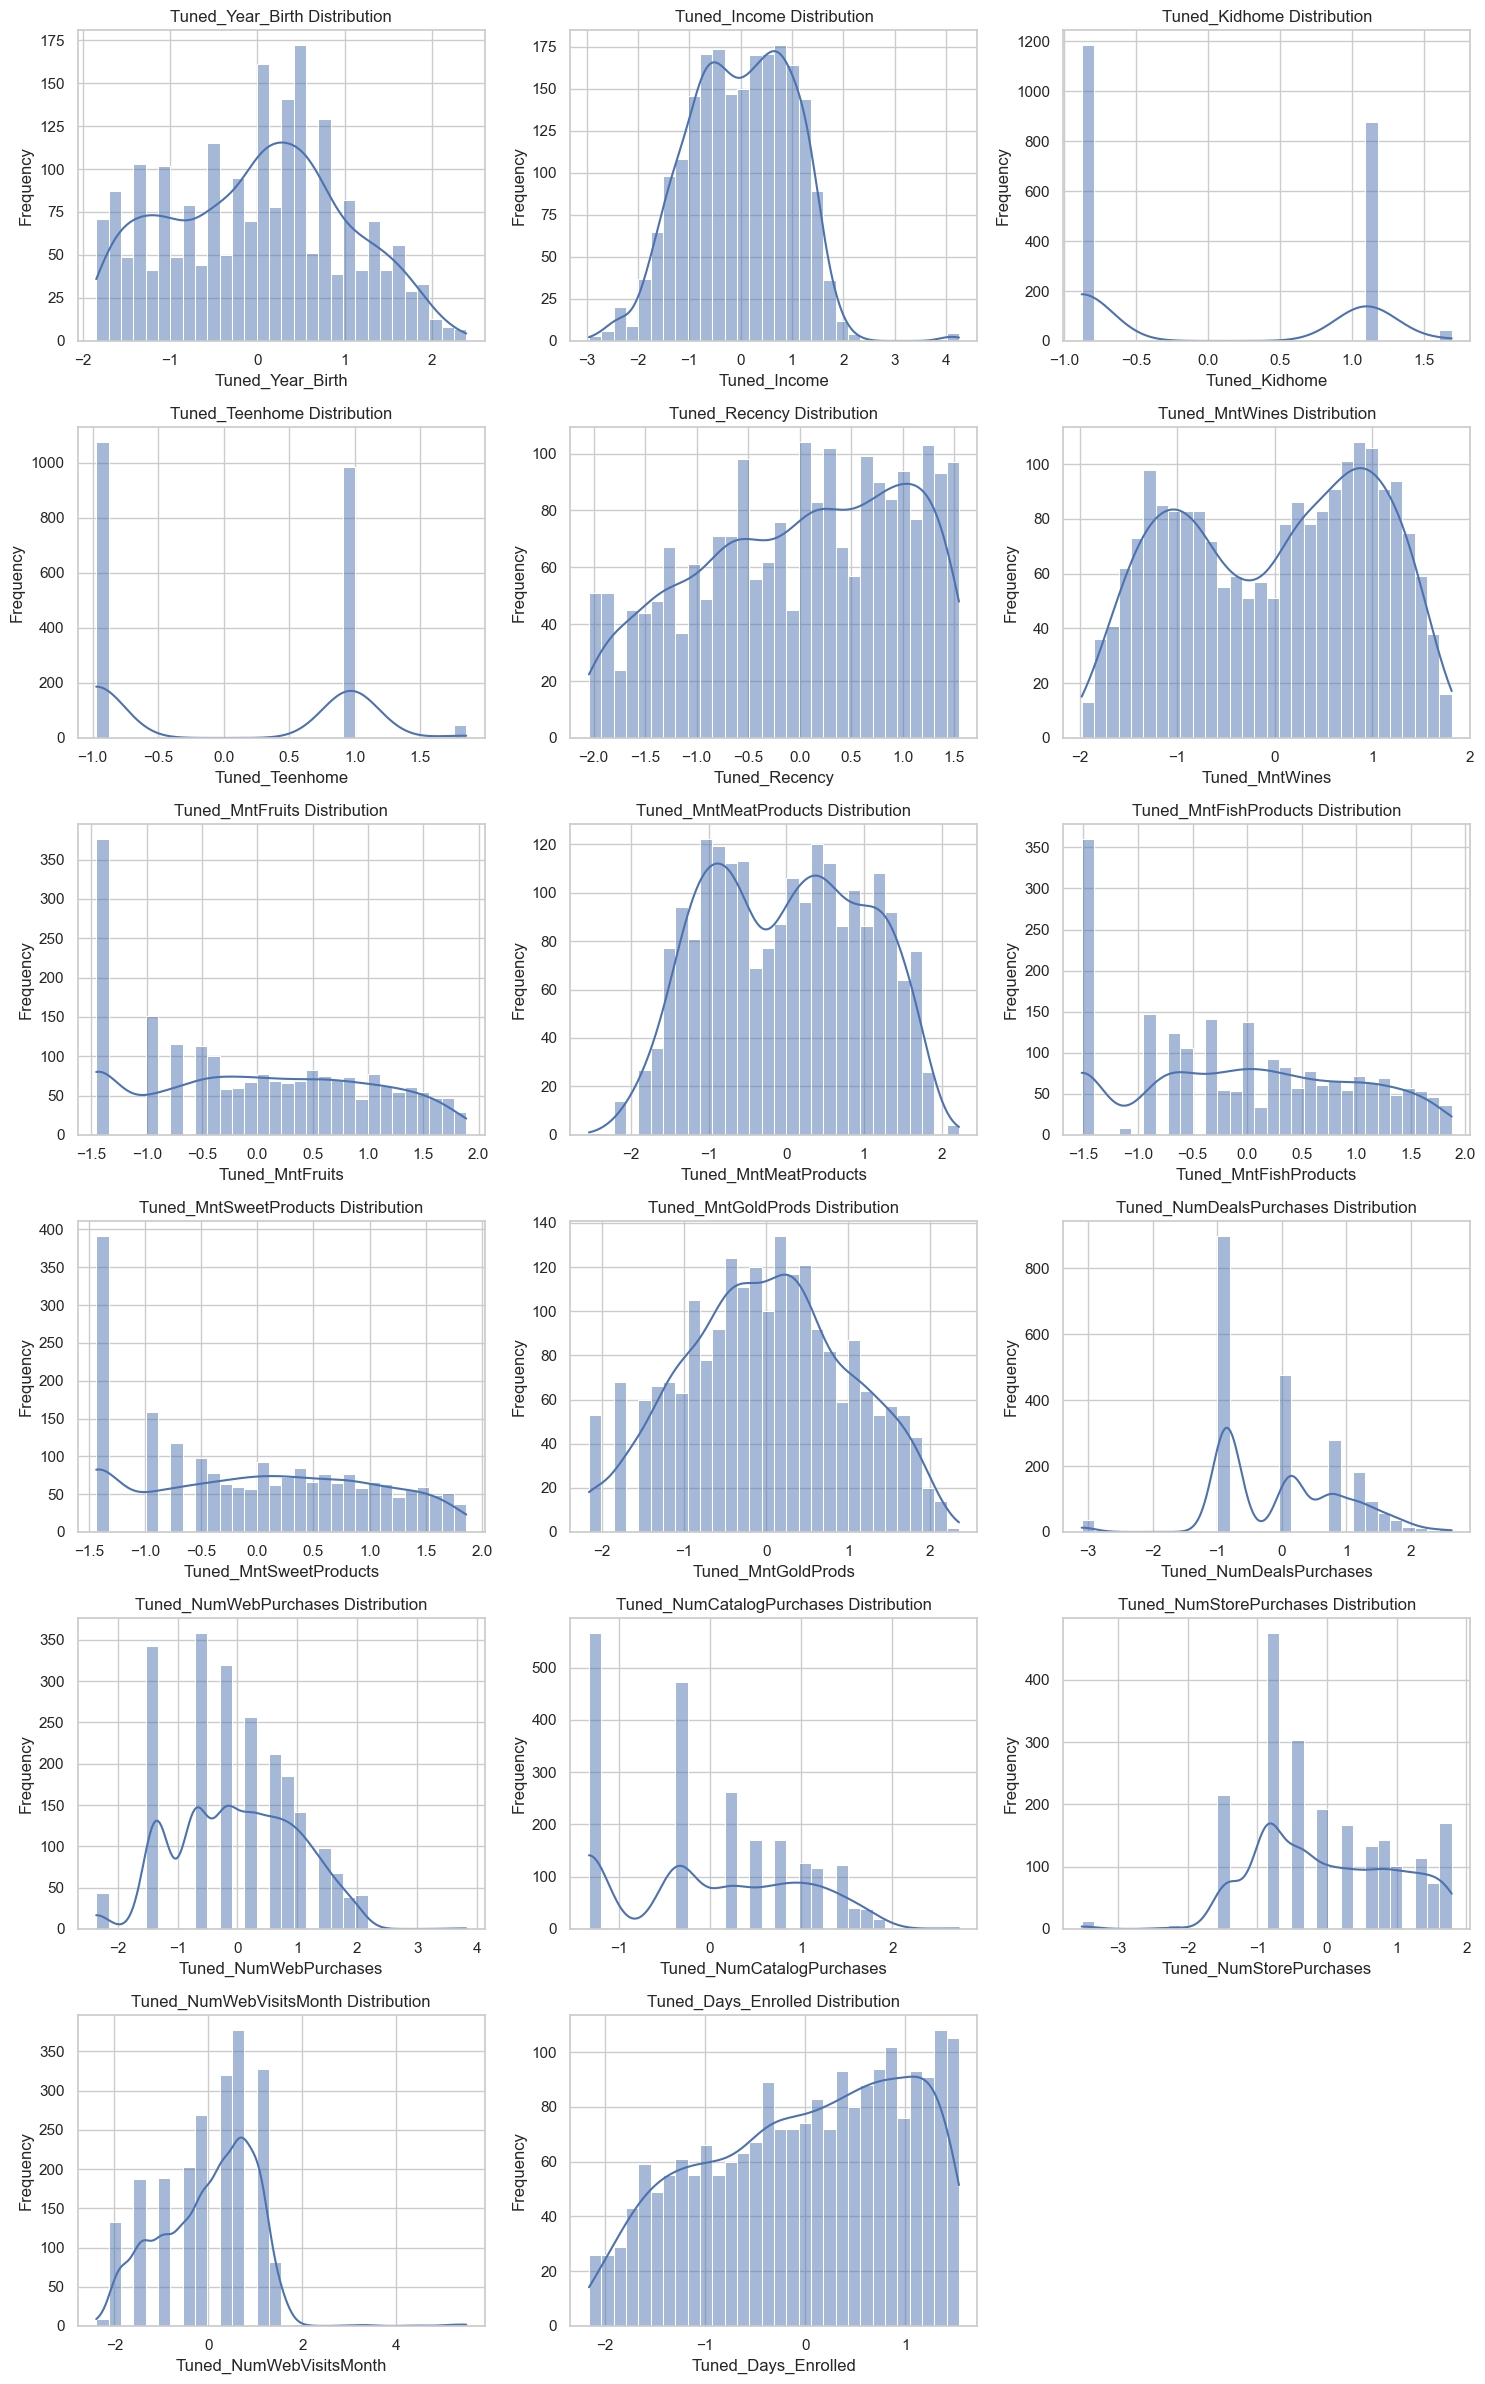

In [29]:
tuned_columns = [
    'Tuned_Year_Birth',
    'Tuned_Income',
    'Tuned_Kidhome',
    'Tuned_Teenhome',
    'Tuned_Recency',
    'Tuned_MntWines',
    'Tuned_MntFruits',
    'Tuned_MntMeatProducts',
    'Tuned_MntFishProducts',
    'Tuned_MntSweetProducts',
    'Tuned_MntGoldProds',
    'Tuned_NumDealsPurchases',
    'Tuned_NumWebPurchases',
    'Tuned_NumCatalogPurchases',
    'Tuned_NumStorePurchases',
    'Tuned_NumWebVisitsMonth',
    "Tuned_Days_Enrolled"
]
plot_hist_kde_grid(tuned_df, tuned_columns, n_cols=3)

In [30]:
tuned_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days_Enrolled,Tuned_Year_Birth,Tuned_Income,Tuned_Kidhome,Tuned_Teenhome,Tuned_Recency,Tuned_MntWines,Tuned_MntFruits,Tuned_MntMeatProducts,Tuned_MntFishProducts,Tuned_MntSweetProducts,Tuned_MntGoldProds,Tuned_NumDealsPurchases,Tuned_NumWebPurchases,Tuned_NumCatalogPurchases,Tuned_NumStorePurchases,Tuned_NumWebVisitsMonth,Tuned_Days_Enrolled
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,663,-1.198978,0.369682,-0.878524,-0.972107,0.376717,1.080868,1.419333,1.437907,1.618178,1.401855,1.094898,0.734613,1.358990,1.733429,-0.397823,0.682579,1.393923
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,113,-1.475416,-0.168243,1.102089,0.971528,-0.278594,-1.188550,-0.980408,-1.368624,-0.865746,-0.966091,-0.935557,0.143112,-1.353390,-0.343860,-1.426758,-0.128312,-1.185314
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,312,-0.462039,0.946642,-0.878524,-0.972107,-0.718674,0.774241,1.076229,0.473633,1.345278,0.569303,0.457282,-0.851012,1.358990,0.191422,1.262369,-0.546943,-0.107577
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,139,1.286870,-1.169456,1.102089,-0.972107,-0.718674,-1.188550,-0.369677,-0.685536,-0.084526,-0.507824,-1.041979,0.143112,-0.699678,-1.324774,-0.397823,0.281028,-1.024796
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,161,1.010850,0.376527,1.102089,-0.972107,1.413912,0.158100,0.999162,0.426010,0.805015,0.716132,-0.334287,1.434948,0.546691,0.554949,0.299759,-0.128312,-0.895390


"The Power Transformation successfully mapped the skewed features to a Gaussian (Normal) distribution, significantly reducing the impact of extreme values compared to standard scaling methods."

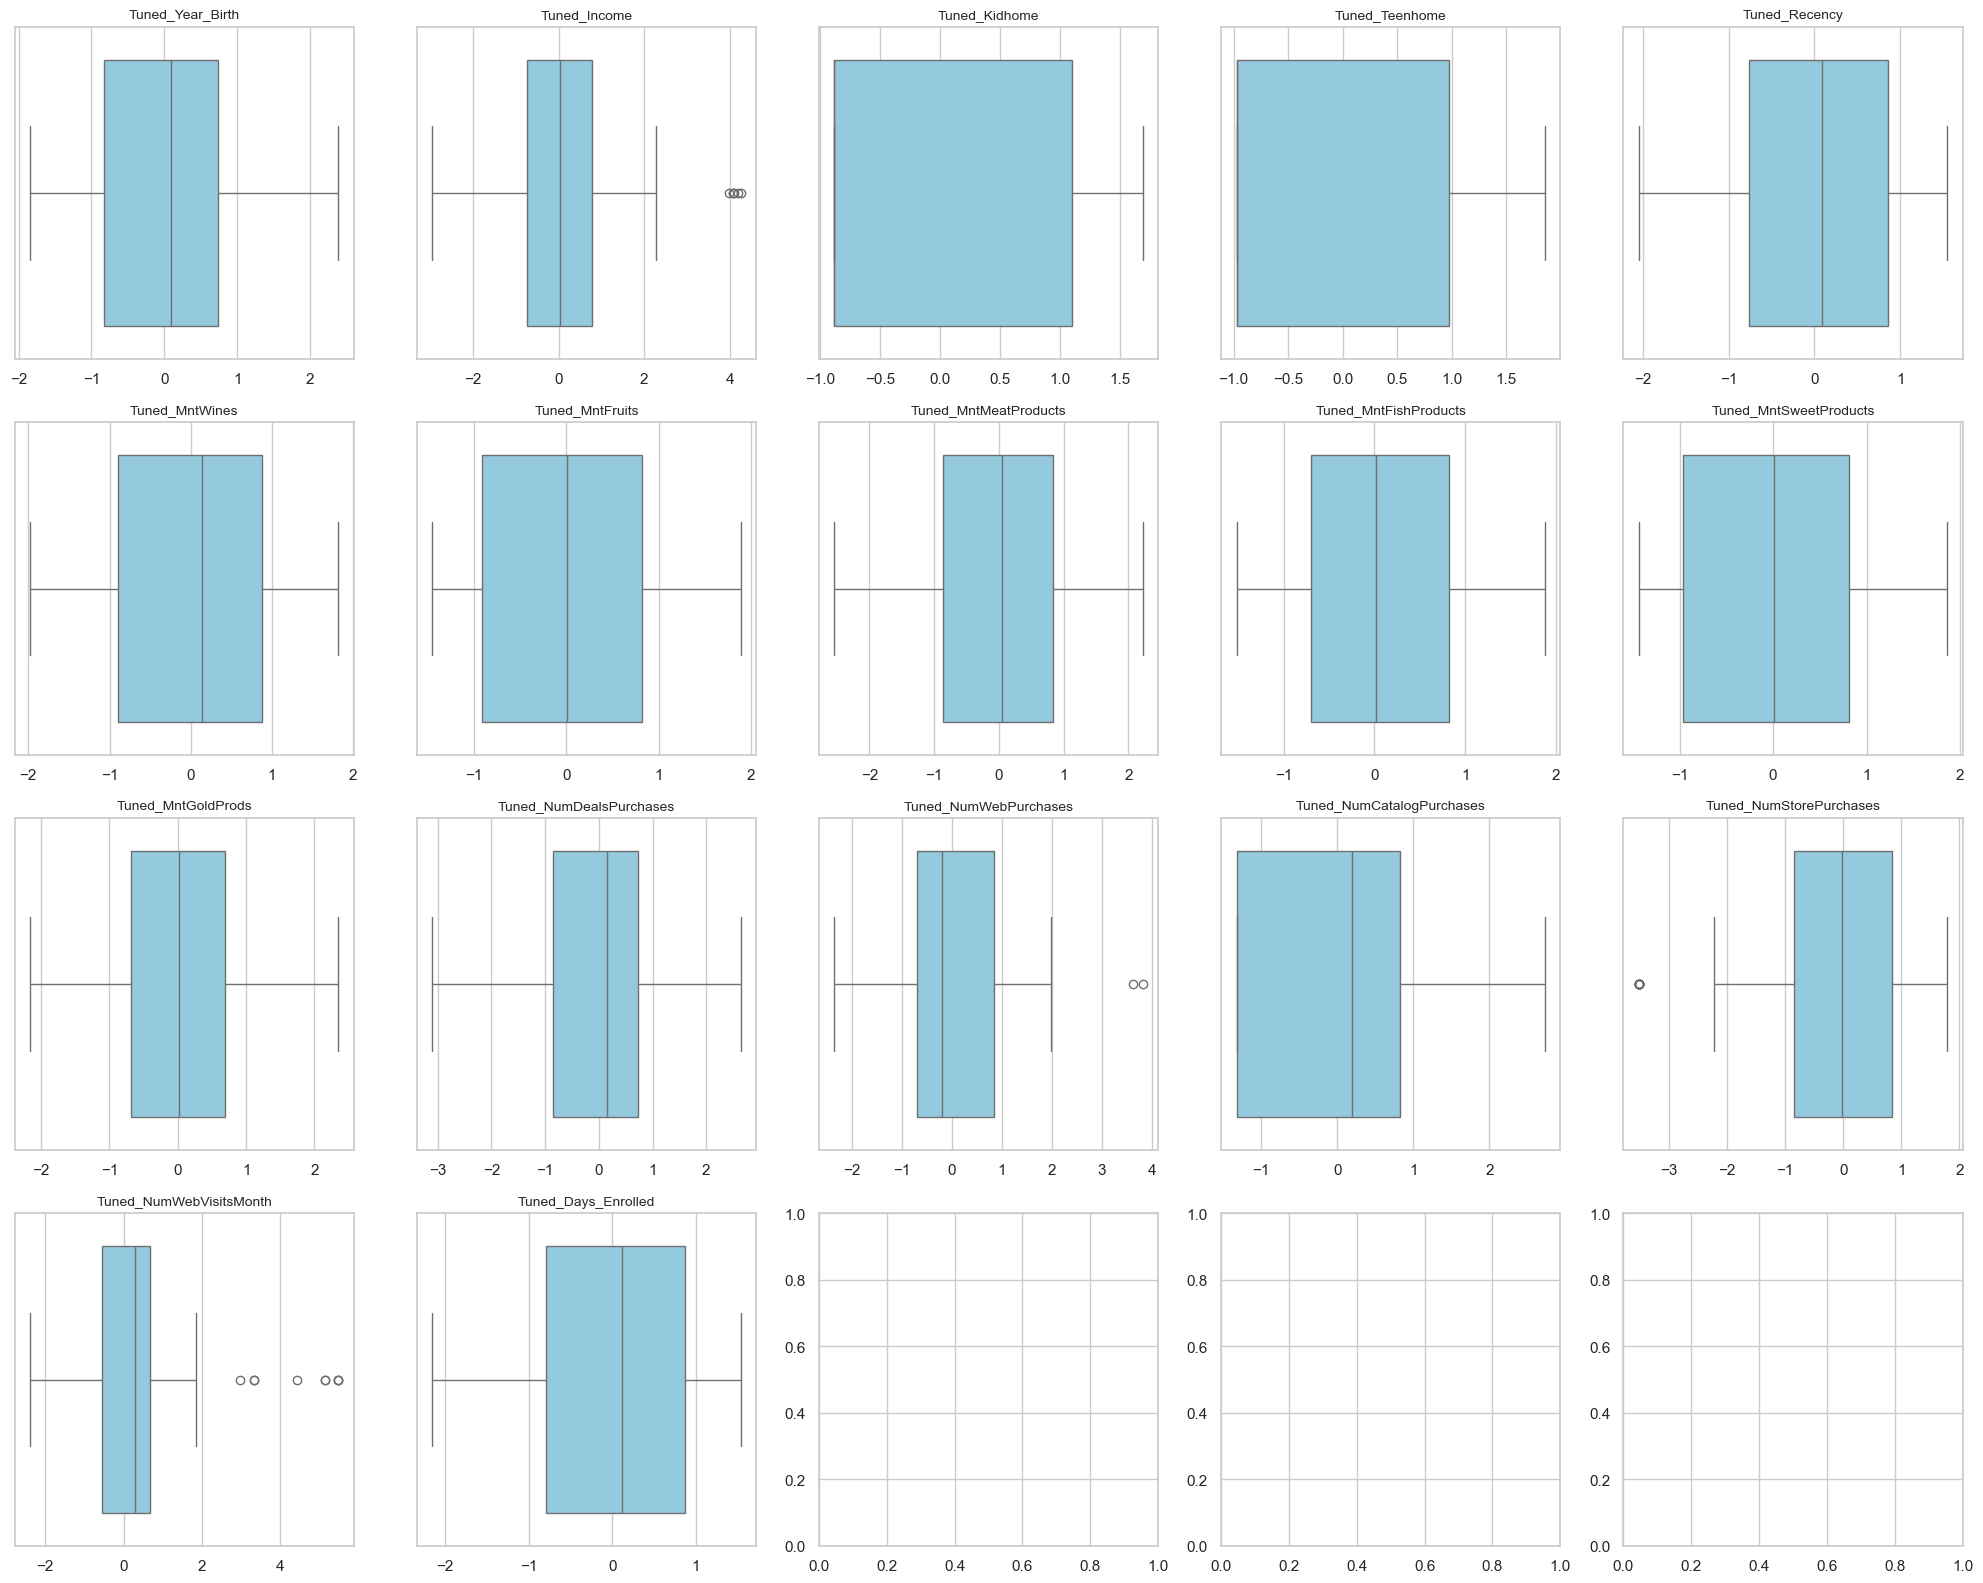

In [31]:
fig, axes = plt.subplots(4, 5, figsize=(20, 16))
axes = axes.flatten()


for i, col in enumerate(tuned_columns):
    sns.boxplot(x=tuned_df[col], ax=axes[i], color='#87CEEB') # Skyblue for visibility
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel('') # Hide x-label to keep it clean

plt.tight_layout()
plt.show()

In [32]:
print(tuned_df.loc[tuned_df["Tuned_NumWebVisitsMonth"] > 2, "Tuned_NumWebVisitsMonth"].value_counts().sum())
print(tuned_df.loc[tuned_df["Tuned_NumStorePurchases"] < -2, "Tuned_NumStorePurchases"].value_counts().sum())
print(tuned_df.loc[tuned_df["Tuned_NumWebPurchases"] > 3, "Tuned_NumWebPurchases"].value_counts().sum())
print(tuned_df.loc[tuned_df["Tuned_Income"] > 2, "Tuned_Income"].value_counts().sum())

9
18
2
12


"Post-transformation analysis detected a minimal number of outliers in Tuned_NumWebVisitsMonth (9), Tuned_NumStorePurchases (18), and Tuned_NumWebPurchases (2). As these records represent a negligible proportion of the total dataset (<1.5%), they were removed to prevent distortion in the clustering process."

In [33]:
# 1. Remove outliers from Tuned_NumWebVisitsMonth
tuned_df.drop(tuned_df[tuned_df["Tuned_NumWebVisitsMonth"] > 2].index, inplace=True)

# 2. Remove outliers from Tuned_NumStorePurchases
tuned_df.drop(tuned_df[tuned_df["Tuned_NumStorePurchases"] < -2].index, inplace=True)

# 3. Remove outliers from Tuned_NumWebPurchases (syntax fixed here)
tuned_df.drop(tuned_df[tuned_df["Tuned_NumWebPurchases"] > 3].index, inplace=True)

# 4. Remove outliers from Tuned_Income
tuned_df.drop(tuned_df[tuned_df["Tuned_Income"] > 2].index, inplace=True)

# --- Confirmation Prints ---
print("Confirmation of Removal (All counts should be 0):")
print("Web Visits > 2:", tuned_df[tuned_df["Tuned_NumWebVisitsMonth"] > 2].shape[0])
print("Store Purchases < -2:", tuned_df[tuned_df["Tuned_NumStorePurchases"] < -2].shape[0])
print("Web Purchases > 3:", tuned_df[tuned_df["Tuned_NumWebPurchases"] > 3].shape[0])
print("Income > 2:", tuned_df[tuned_df["Tuned_Income"] > 2].shape[0])

Confirmation of Removal (All counts should be 0):
Web Visits > 2: 0
Store Purchases < -2: 0
Web Purchases > 3: 0
Income > 2: 0


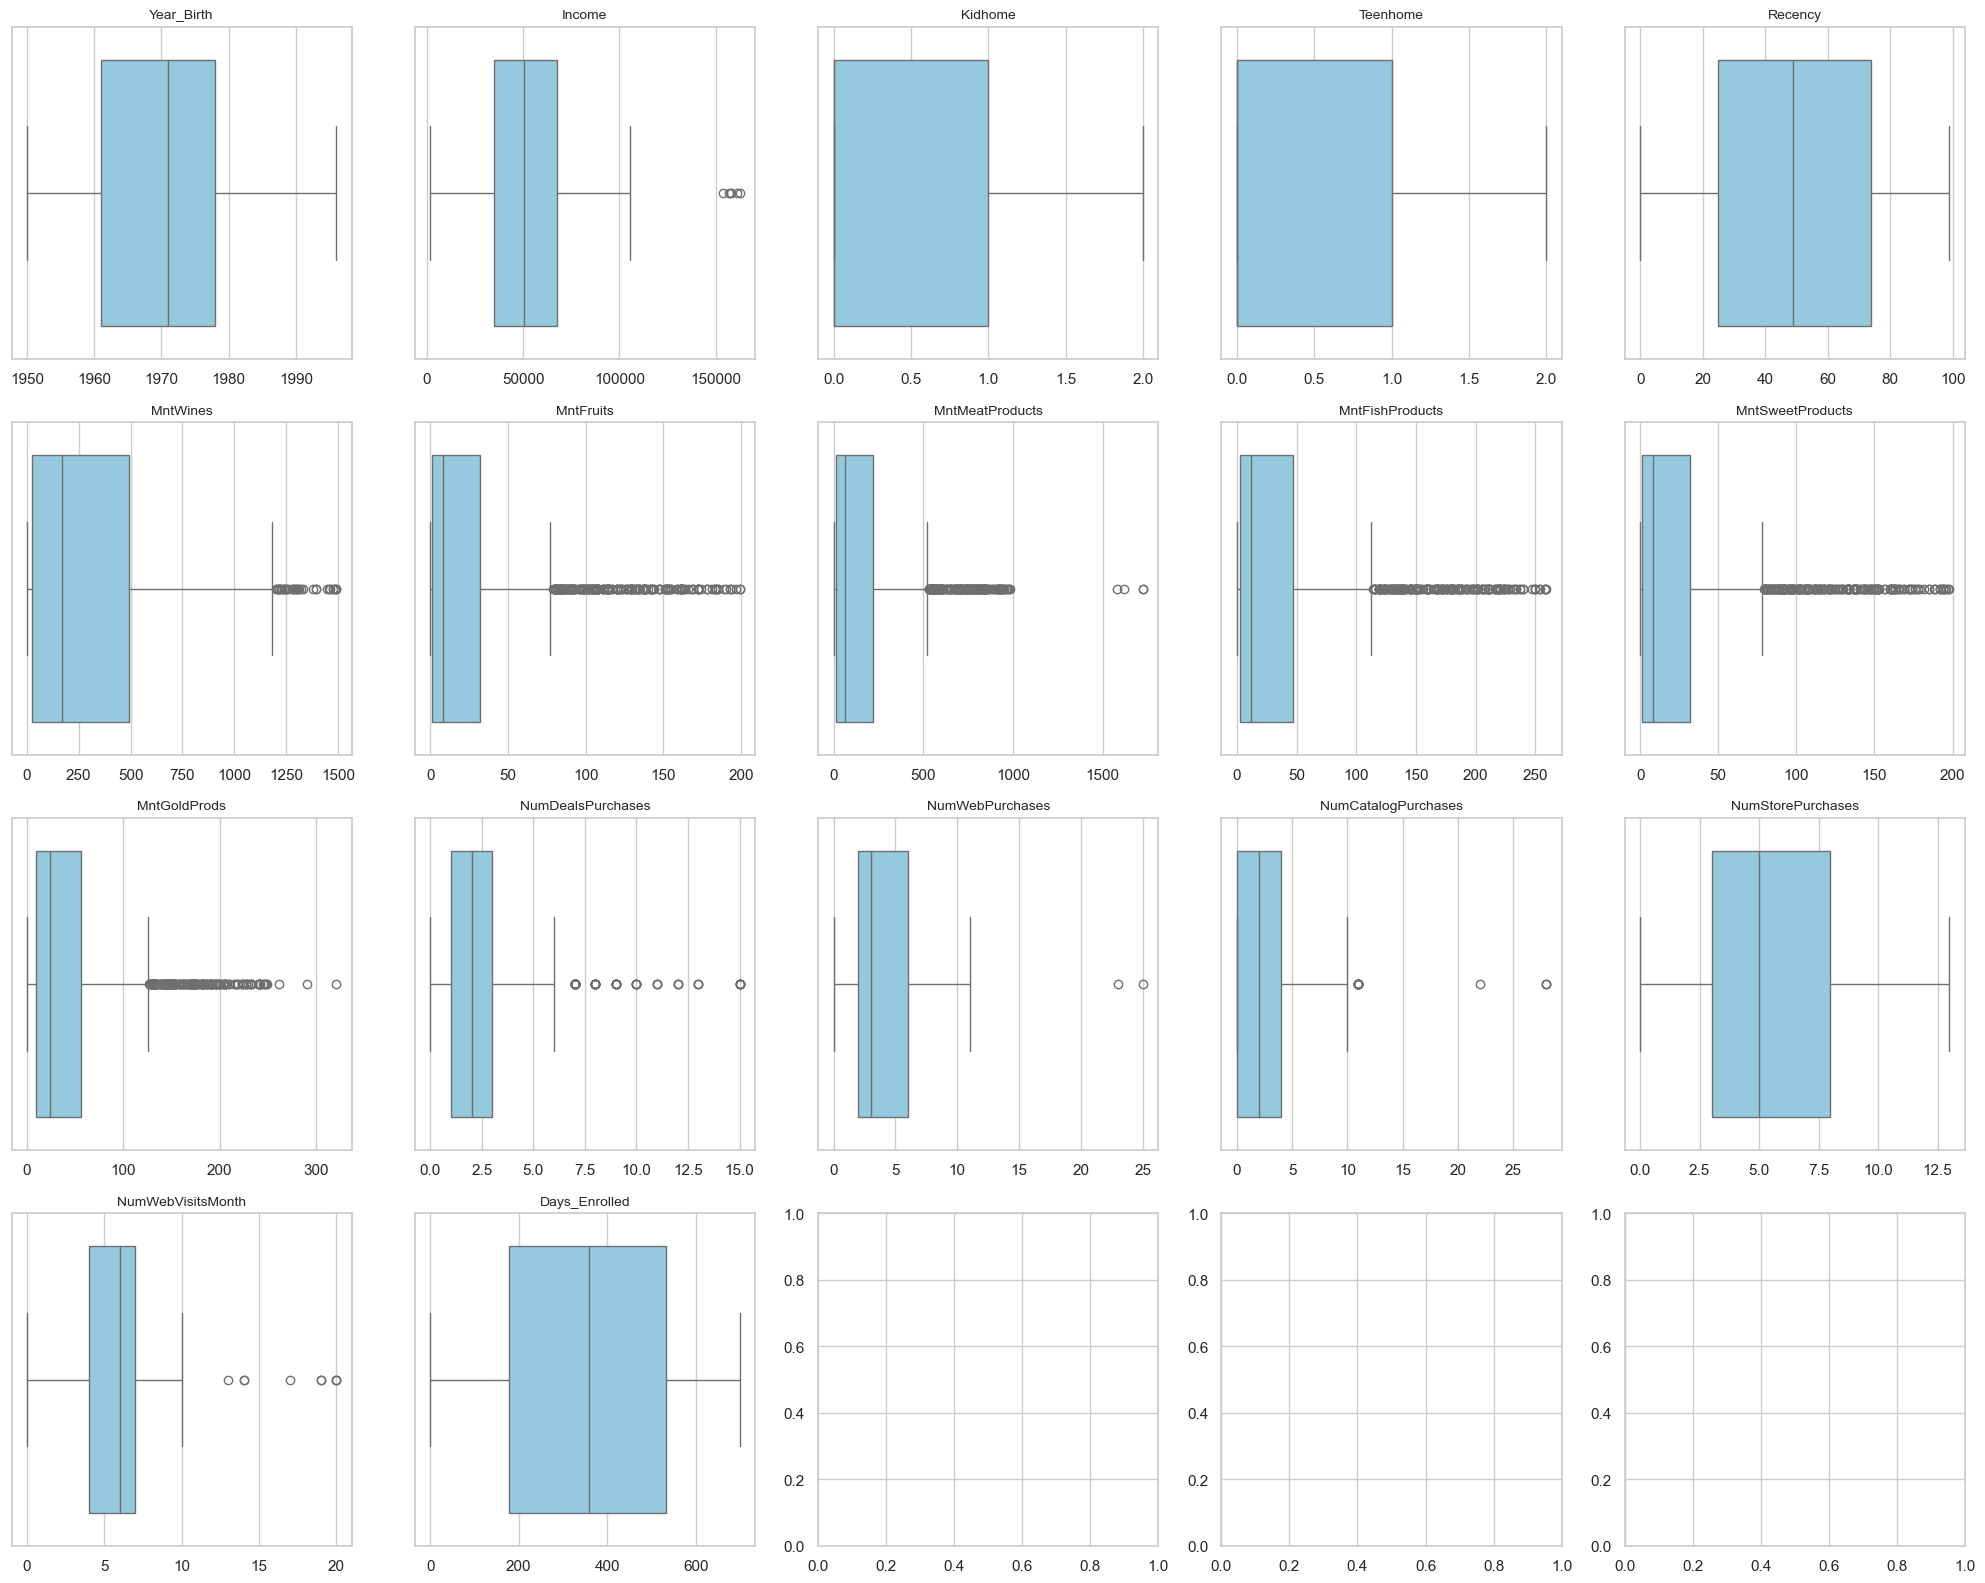

In [34]:
# Pre Transformation
fig, axes = plt.subplots(4,5, figsize=(20, 16))
axes = axes.flatten()


for i, col in enumerate(num_col):
    sns.boxplot(x=df[col], ax=axes[i], color='#87CEEB') # Skyblue for visibility
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel('') # Hide x-label to keep it clean

plt.tight_layout()
plt.show()

Few Outliers were discovered after Transformation compared to pre transformation

In [35]:
df[num_col]

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Days_Enrolled
0,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,663
1,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,113
2,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,312
3,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,139
4,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,1974,34421.0,1,0,81,3,3,7,6,2,9,1,1,0,2,7,363
2102,1967,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,381
2103,1981,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,155
2104,1956,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,156


In [36]:
# Dropping num_col
tuned_df.drop(columns=num_col, inplace=True, axis=1)
tuned_df.head()

,ID,Education,Marital_Status,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Tuned_Year_Birth,Tuned_Income,Tuned_Kidhome,Tuned_Teenhome,Tuned_Recency,Tuned_MntWines,Tuned_MntFruits,Tuned_MntMeatProducts,Tuned_MntFishProducts,Tuned_MntSweetProducts,Tuned_MntGoldProds,Tuned_NumDealsPurchases,Tuned_NumWebPurchases,Tuned_NumCatalogPurchases,Tuned_NumStorePurchases,Tuned_NumWebVisitsMonth,Tuned_Days_Enrolled
0,5524,Graduation,Single,0,0,0,0,0,0,1,-1.198978,0.369682,-0.878524,-0.972107,0.376717,1.080868,1.419333,1.437907,1.618178,1.401855,1.094898,0.734613,1.358990,1.733429,-0.397823,0.682579,1.393923
1,2174,Graduation,Single,0,0,0,0,0,0,0,-1.475416,-0.168243,1.102089,0.971528,-0.278594,-1.188550,-0.980408,-1.368624,-0.865746,-0.966091,-0.935557,0.143112,-1.353390,-0.343860,-1.426758,-0.128312,-1.185314
2,4141,Graduation,Together,0,0,0,0,0,0,0,-0.462039,0.946642,-0.878524,-0.972107,-0.718674,0.774241,1.076229,0.473633,1.345278,0.569303,0.457282,-0.851012,1.358990,0.191422,1.262369,-0.546943,-0.107577
3,6182,Graduation,Together,0,0,0,0,0,0,0,1.286870,-1.169456,1.102089,-0.972107,-0.718674,-1.188550,-0.369677,-0.685536,-0.084526,-0.507824,-1.041979,0.143112,-0.699678,-1.324774,-0.397823,0.281028,-1.024796
4,5324,PhD,Married,0,0,0,0,0,0,0,1.010850,0.376527,1.102089,-0.972107,1.413912,0.158100,0.999162,0.426010,0.805015,0.716132,-0.334287,1.434948,0.546691,0.554949,0.299759,-0.128312,-0.895390


## Categorical Columns

In [37]:
cat_col

['Education', 'Marital_Status']

In [38]:
for col in cat_col:
    print_unquie_rows(df, col)

Unique values in column 'Education':
Graduation
PhD
Master
Basic
2n Cycle
Unique values in column 'Marital_Status':
Single
Together
Married
Divorced
Widow
Alone
Absurd
YOLO


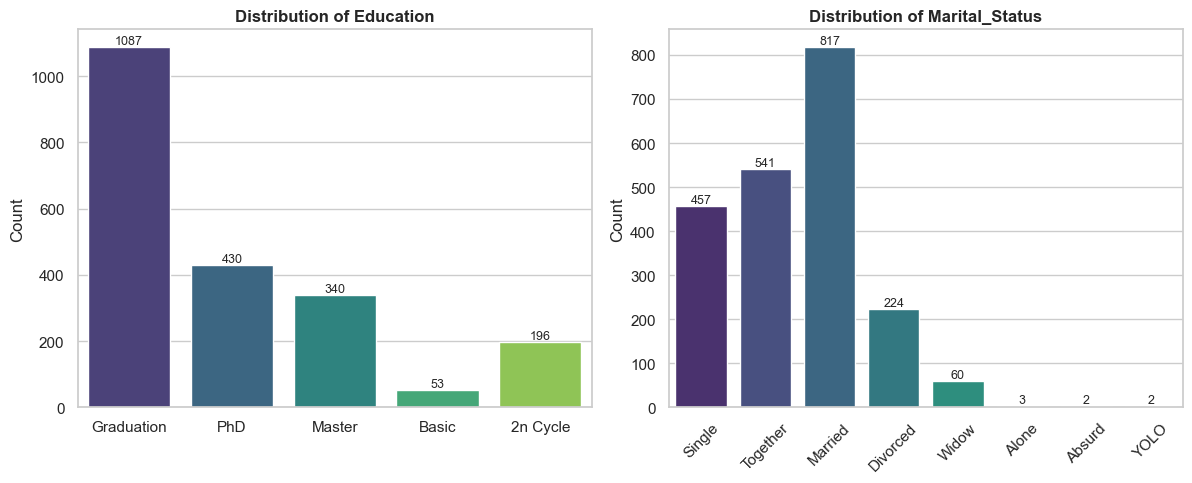

In [39]:
# Define grid size
n_cols = 3
n_rows = (len(cat_col) - 1) // n_cols + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

# Iterate through all axes to ensure empty ones are hidden
for i, ax in enumerate(axes):
    if i < len(cat_col):
        col = cat_col[i]
        
        if col in df.columns:
            # FIX: Assigned 'hue=col' and 'legend=False' to solve the warning
            sns.countplot(data=df, x=col, ax=ax, palette="viridis", hue=col, legend=False)

            # Formatting
            ax.set_title(f"Distribution of {col}", fontsize=12, fontweight="bold")
            ax.set_xlabel("")
            ax.set_ylabel("Count")

            # Rotate x-labels if there are many categories
            if df[col].nunique() > 5:
                ax.tick_params(axis="x", rotation=45)

            # Add Data Labels
            for container in ax.containers:
                ax.bar_label(container, size=9)
        else:
            ax.set_visible(False) # Hide if column not found in df
    else:
        ax.set_visible(False) # Hide extra empty subplots

plt.tight_layout()
plt.show()

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans

In [41]:
preprocessors = ColumnTransformer(
    transformers=[
        ("numeric", "passthrough", tuned_columns),
        ("binary", "passthrough", bin_cols),
        # FIXED: LabelEncoder() -> OneHotEncoder()
        ("categorical", OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_col)
    ],
    remainder="drop"
)

K     | Inertia        
-------------------------
2     | 25828.54
3     | 22688.82
4     | 21237.21
5     | 20155.70
6     | 19390.33
7     | 18969.27
8     | 18590.09
9     | 18198.02
10    | 17787.53


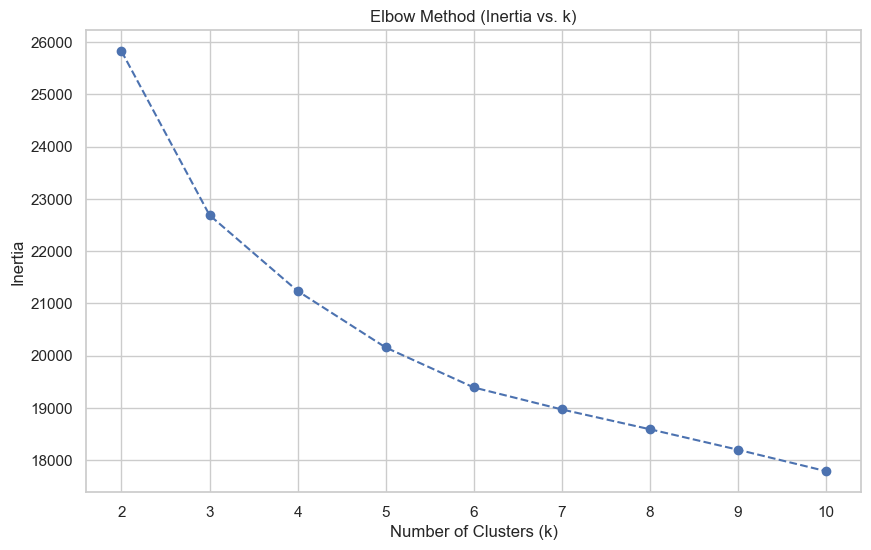

In [42]:
# Pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessors),
    ("kmeans", KMeans(n_clusters=2, init="k-means++", random_state=42)) # <--- Lowercase 'k'
])

# 3. Elbow Method Loop
inertia_values = []
k_range = range(2, 11)

print(f"{'K':<5} | {'Inertia':<15}")
print("-" * 25)

for k in k_range:
    # Now this works because the step is named 'kmeans' (lowercase)
    pipeline.set_params(kmeans__n_clusters=k)
    
    pipeline.fit(tuned_df)
    
    current_inertia = pipeline.named_steps['kmeans'].inertia_
    inertia_values.append(current_inertia)
    
    print(f"{k:<5} | {current_inertia:.2f}")

# 4. Plot
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o', linestyle='--', color='b')
plt.title('Elbow Method (Inertia vs. k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [43]:
from sklearn.metrics import silhouette_score

print(f"{'K':<5} | {'Silhouette Score':<15}")
print("-" * 25)

for k in range(2, 6): # We narrow the range to your top candidates
    # Update pipeline
    pipeline.set_params(kmeans__n_clusters=k)
    pipeline.fit(tuned_df)
    
    # Get labels
    labels = pipeline.named_steps['kmeans'].labels_
    
    # Calculate Score
    # Note: We pass the 'preprocessed' data to silhouette, NOT the raw df
    # We must transform df first to get the actual data the model saw
    X_processed = pipeline.named_steps['preprocessor'].transform(tuned_df)
    
    score = silhouette_score(X_processed, labels)
    print(f"{k:<5} | {score:.3f}")

K     | Silhouette Score
-------------------------
2     | 0.277
3     | 0.204
4     | 0.149
5     | 0.128


In [44]:
# 1. Fit the Pipeline on your CLEAN data (tuned_df)
# We use the cleaned data to train the model so outliers don't mess up the centers.
pipeline.set_params(kmeans__n_clusters=3)
pipeline.fit(tuned_df)

# 2. Get the Labels
# These labels correspond exactly to the rows in tuned_df
cluster_labels = pipeline.named_steps['kmeans'].labels_

# 3. Assign labels to tuned_df first
# This works perfectly because the lengths are identical
tuned_df['Cluster'] = cluster_labels

# 4. Map the Clusters back to the Original 'df' using ID
# We create a mini-dataframe with just IDs and their new Cluster
cluster_map = tuned_df[['ID', 'Cluster']]

# Perform a LEFT MERGE
# - Keeps all rows from the original 'df'
# - Matches rows based on 'ID'
# - Rows that were dropped (outliers) will essentially get a "NaN" cluster
df_final = df.merge(cluster_map, on='ID', how='left')

# 5. Verify the Result
print("Merge Complete.")
print("-" * 30)
print(df_final['Cluster'].value_counts(dropna=False))

Merge Complete.
------------------------------
Cluster
0.0    848
2.0    632
1.0    602
NaN     24
Name: count, dtype: int64


In [45]:
df_final

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days_Enrolled,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,663,1.0
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,113,0.0
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,312,1.0
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,139,0.0
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,161,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,8372,1974,Graduation,Married,34421.0,1,0,81,3,3,7,6,2,9,1,1,0,2,7,0,0,0,0,0,0,0,363,0.0
2102,10870,1967,Graduation,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,381,1.0
2103,7270,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,155,1.0
2104,8235,1956,Master,Together,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,156,1.0


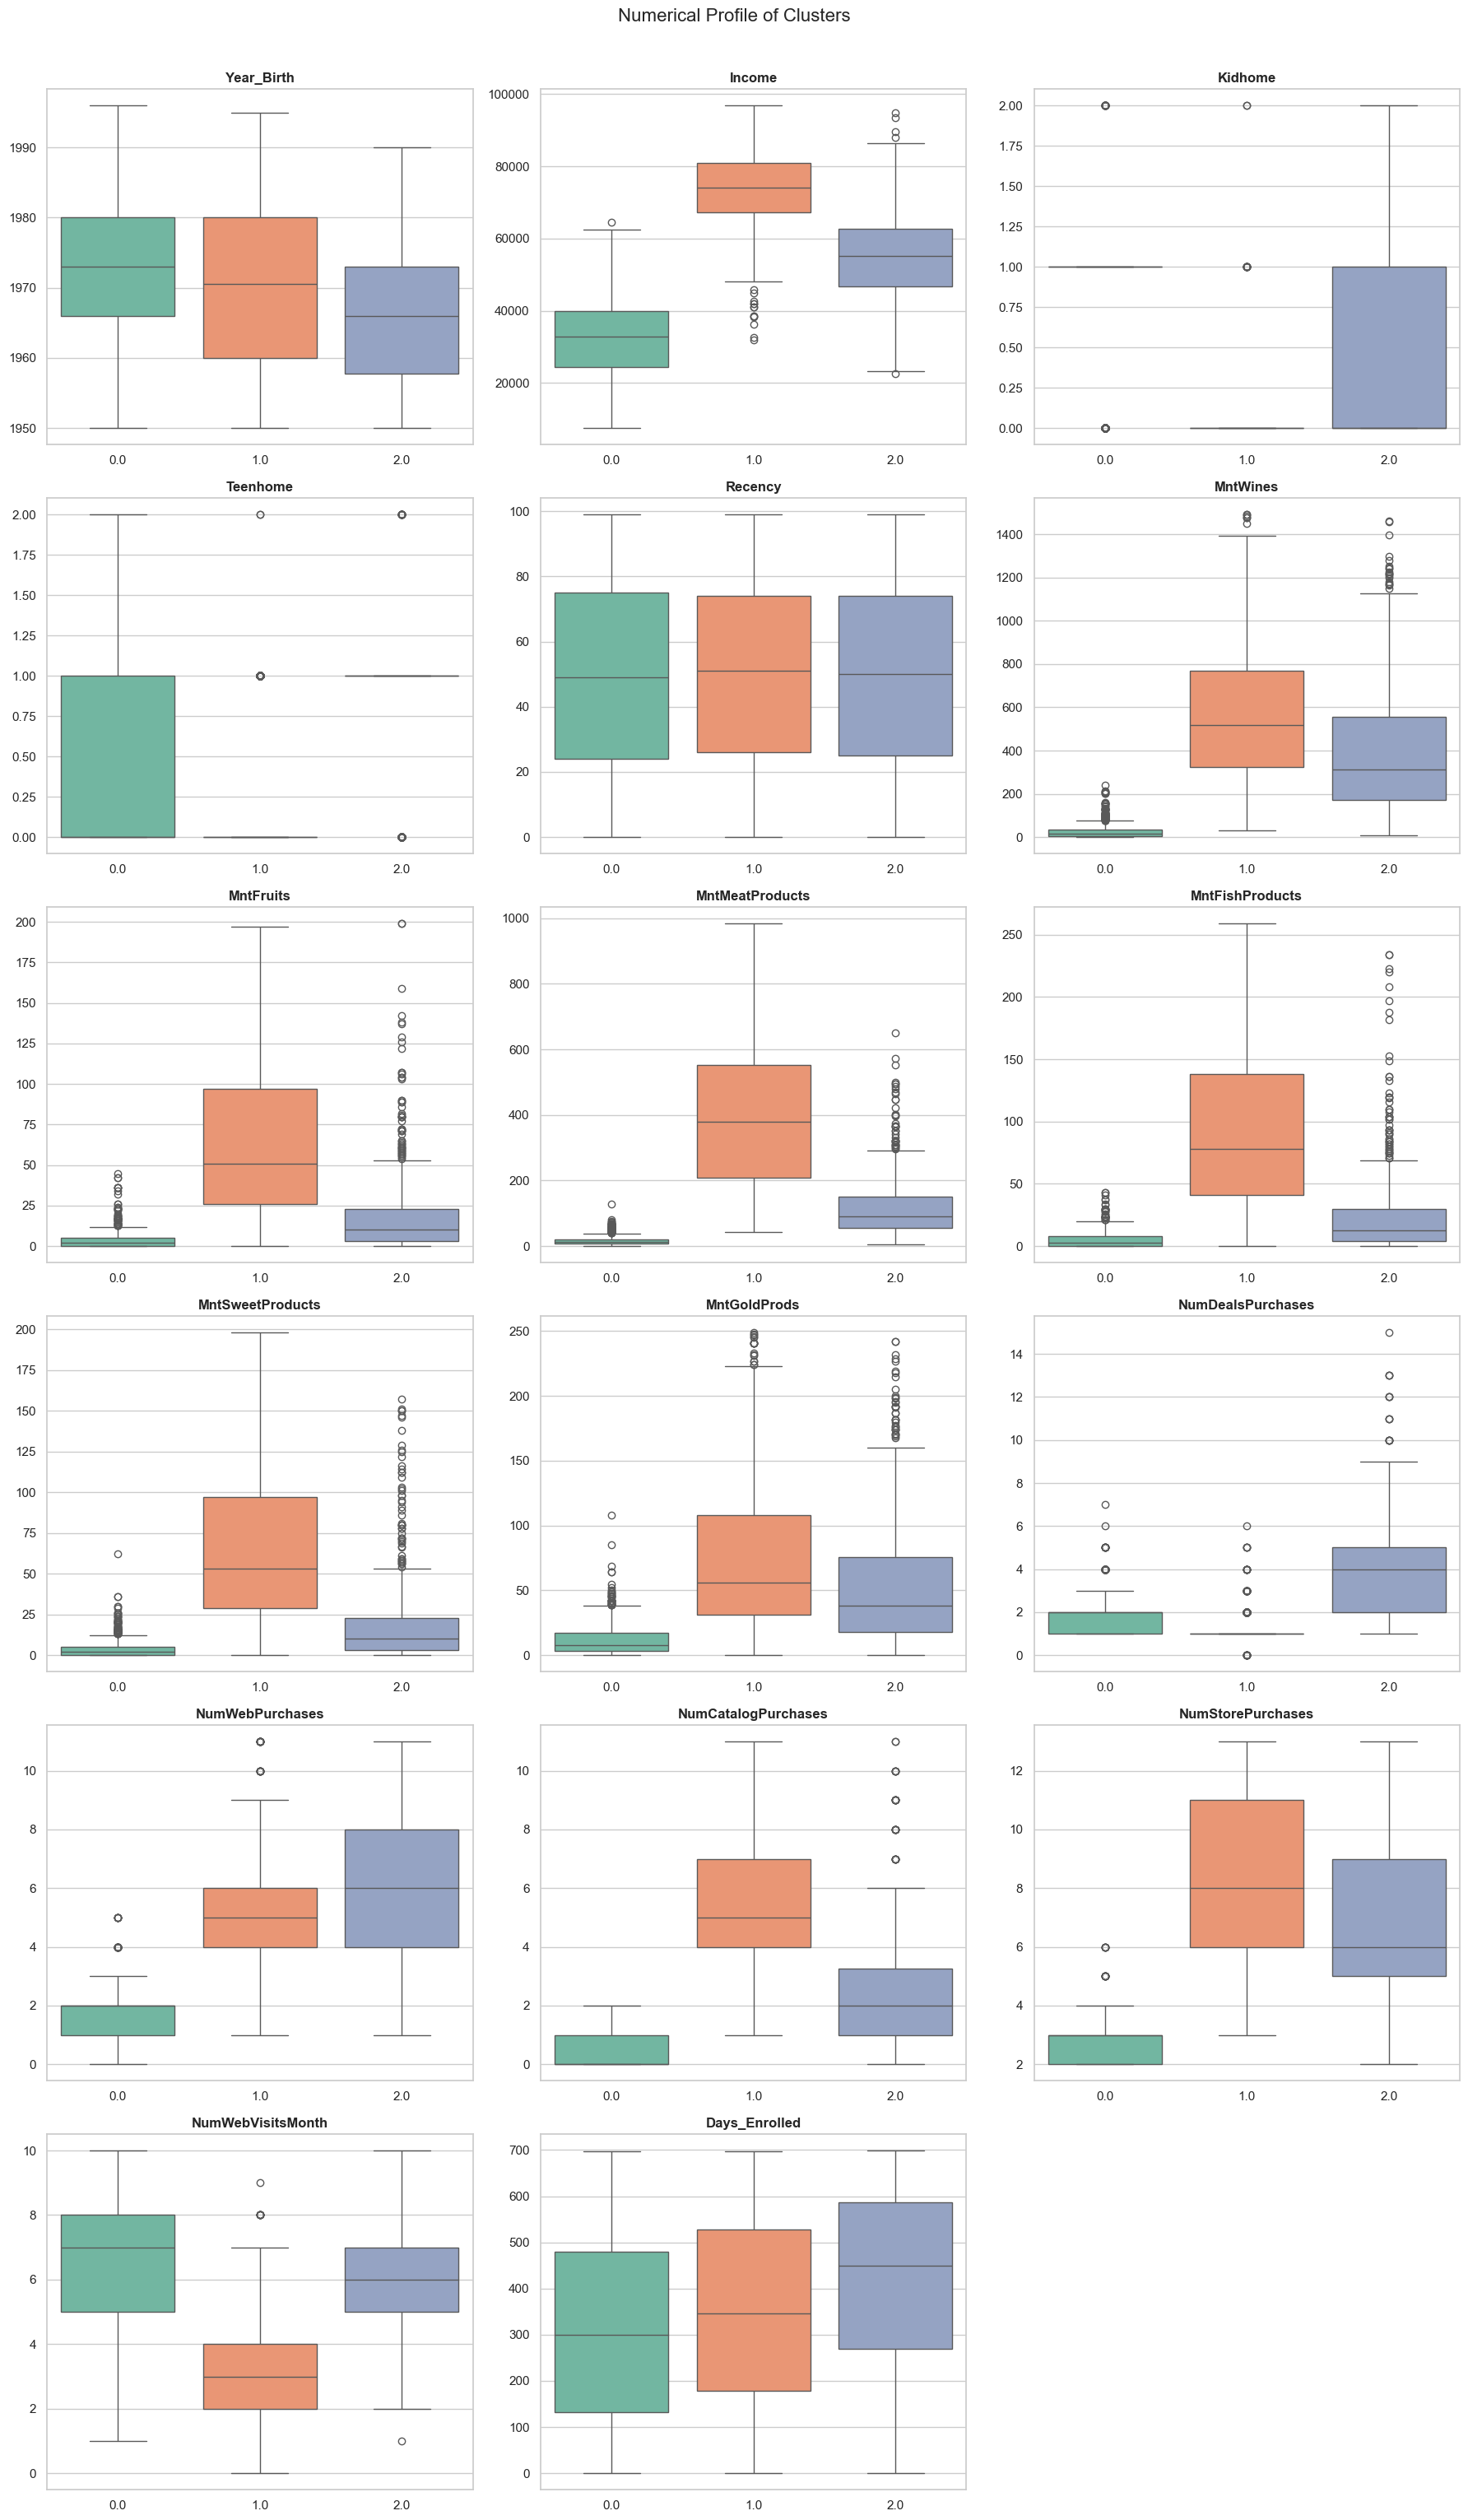

In [49]:
import math

# 1. Define columns to plot (Your numeric list)
# We filter out 'ID' if it's in there, as plotting ID is useless
cols_to_plot = [col for col in num_col if col != 'ID']

# 2. Setup Grid (3 columns per row)
n_cols = 3
n_rows = math.ceil(len(cols_to_plot) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

# 3. Loop and Plot
for i, col in enumerate(cols_to_plot):
    if col in df_final.columns:
        sns.boxplot(
            data=df_final, 
            x='Cluster',  # Use the label column we created ('Cluster 0', etc.)
            y=col, 
            hue='Cluster', 
            palette='Set2', 
            legend=False, 
            ax=axes[i]
        )
        axes[i].set_title(col, fontsize=12, fontweight='bold')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
    else:
        axes[i].set_visible(False)

# Hide empty subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.suptitle("Numerical Profile of Clusters", y=1.02, fontsize=16)
plt.show()

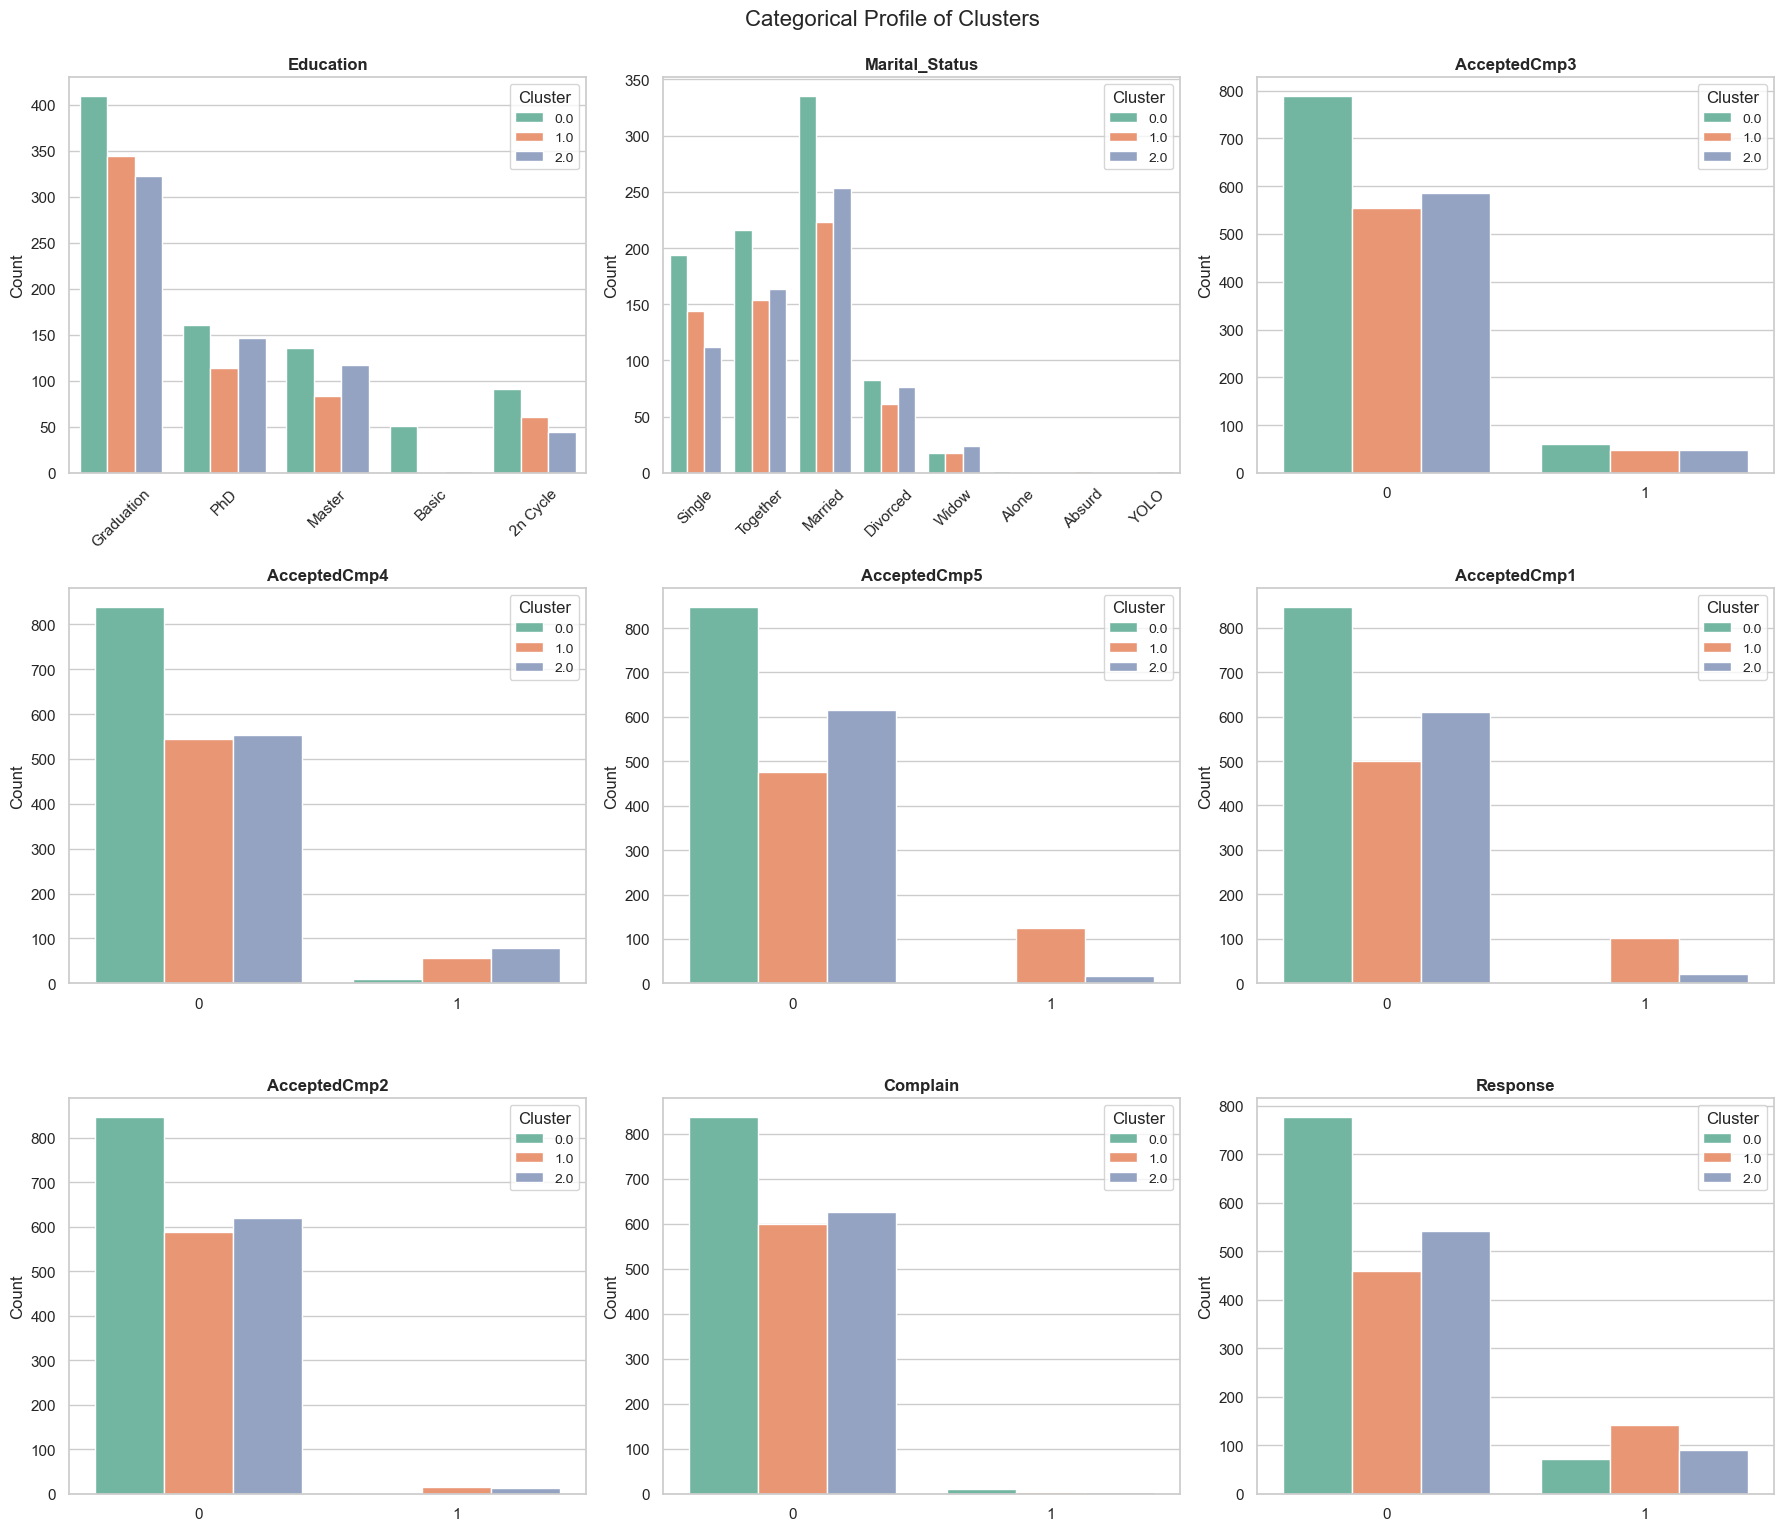

In [50]:
# 1. Combine Categorical and Binary columns for this view
cat_cols_to_plot = cat_col + bin_cols

# 2. Setup Grid
n_rows = math.ceil(len(cat_cols_to_plot) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

# 3. Loop and Plot
for i, col in enumerate(cat_cols_to_plot):
    if col in df_final.columns:
        # We use countplot with 'hue' to break it down by Cluster
        sns.countplot(
            data=df_final, 
            x=col, 
            hue='Cluster', 
            palette='Set2', 
            ax=axes[i]
        )
        axes[i].set_title(col, fontsize=12, fontweight='bold')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Count')
        axes[i].legend(title='Cluster', loc='upper right', fontsize='small')
        
        # Rotate labels if there are many categories (like Dates or Jobs)
        if df_final[col].nunique() > 4:
            axes[i].tick_params(axis='x', rotation=45)
    else:
        axes[i].set_visible(False)

# Hide empty subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.suptitle("Categorical Profile of Clusters", y=1.02, fontsize=16)
plt.show()

In [56]:
# Select key columns to summarize
# We don't need all 20 columns, just the ones that drive money and behavior
summary_cols = num_col + bin_cols
# Group by Cluster and calculate the Mean (Average)
cluster_summary = df_final.groupby('Cluster')[summary_cols].mean().round(2)

# Transpose it (swap rows/cols) so it's easier to read
print(cluster_summary.T)

Cluster                   0.0       1.0       2.0
Year_Birth            1972.73   1970.49   1965.88
Income               32588.08  73417.40  54896.51
Kidhome                  0.84      0.05      0.35
Teenhome                 0.42      0.25      0.89
Recency                 48.84     49.86     49.33
MntWines                27.26    563.77    403.21
MntFruits                3.84     64.92     18.51
MntMeatProducts         16.12    404.08    120.58
MntFishProducts          5.48     94.10     24.60
MntSweetProducts         3.97     66.43     18.59
MntGoldProds            11.96     76.08     55.05
NumDealsPurchases        1.86      1.33      3.92
NumWebPurchases          1.82      5.16      5.93
NumCatalogPurchases      0.40      5.48      2.68
NumStorePurchases        3.00      8.45      6.94
NumWebVisitsMonth        6.46      2.95      6.16
Days_Enrolled          313.52    349.23    416.45
AcceptedCmp3             0.07      0.08      0.07
AcceptedCmp4             0.01      0.09      0.12


In [58]:
print("--- Categorical Distribution by Cluster ---")

for col in cat_col:
    if col in df_final.columns:
        print(f"\n{col} Breakdown (%):")
        # Crosstab calculates the frequency of each category per cluster
        # normalize='index' converts counts to percentages (0.0 to 1.0)
        cross_tab = pd.crosstab(
            df_final['Cluster'], 
            df_final[col], 
            normalize='index'
        ).round(2) * 100  # Multiply by 100 for readable %
        
        print(cross_tab)
        print("-" * 40)

--- Categorical Distribution by Cluster ---

Education Breakdown (%):
Education  2n Cycle  Basic  Graduation  Master   PhD
Cluster                                             
0.0            11.0    6.0        48.0    16.0  19.0
1.0            10.0    0.0        57.0    14.0  19.0
2.0             7.0    0.0        51.0    19.0  23.0
----------------------------------------

Marital_Status Breakdown (%):
Marital_Status  Absurd  Alone  Divorced  Married  Single  Together  Widow  \
Cluster                                                                     
0.0                0.0    0.0      10.0     40.0    23.0      25.0    2.0   
1.0                0.0    0.0      10.0     37.0    24.0      26.0    3.0   
2.0                0.0    0.0      12.0     40.0    18.0      26.0    4.0   

Marital_Status  YOLO  
Cluster               
0.0              0.0  
1.0              0.0  
2.0              0.0  
----------------------------------------
